In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools.miceutil as mt

plt.rc("axes", labelsize=15)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("xtick", direction='in')
plt.rc("ytick", direction='in')

In [2]:
    
    
def draw_power_spec_waveform(group=False):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    the_choosen_len = 2790

    if group == True:
        control_data = np.genfromtxt(path+"control_group_average_activiry.txt")
        mutant_data = np.genfromtxt(path+"mutant_group_average_activiry.txt")
        hyper_data = np.genfromtxt(path+"mutant_hyper_group_average_activiry.txt")
    else:
        control_data = np.genfromtxt(path+control_mouse+"_activity_reduce.txt")
        mutant_data = np.genfromtxt(path+mutant_mouse+"_activity_reduce.txt")
        hyper_data = np.genfromtxt(path+hyper_mouse+"_activity_reduce.txt")

    x = np.arange(the_choosen_len)
    x = x / 4 / 24

    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(3,3, hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylabel('Activity')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    control_plot = fig.add_subplot(gs[0,0:2])
    mutant_plot = fig.add_subplot(gs[1,0:2], sharex=control_plot)
    hyper_plot = fig.add_subplot(gs[2,0:2], sharex=control_plot)

    data = np.square(np.abs(np.fft.rfft(control_data-np.mean(control_data))))
    data = data - np.mean(data)
    # data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x
    control_plot.set_xscale('log')
    # control_plot.set_yscale('log')
    handle1, = control_plot.plot(x, data, 'g', label='control')
    control_plot.set_xlim(np.min(x),48)

    data = np.square(np.abs(np.fft.rfft(mutant_data-np.mean(mutant_data))))
    data = data - np.mean(data)
    # data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x
    mutant_plot.set_xscale('log')
    # mutant_plot.set_yscale('log')
    handle2, = mutant_plot.plot(x, data, 'b', label='mutant - normal activity')
    mutant_plot.set_xlim(np.min(x),48)

    data = np.square(np.abs(np.fft.rfft(hyper_data-np.mean(hyper_data))))
    data = data - np.mean(data)
    # data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x
    hyper_plot.set_xscale('log')
    # hyper_plot.set_yscale('log')
    handle3, = hyper_plot.plot(x, data, 'r', label='mutant - hyper activity')
    hyper_plot.set_xlim(np.min(x),48)

    control_plot.legend(handles=[handle1, handle2, handle3], loc='best')

    # Draw waveform
    control_waveform_plot = fig.add_subplot(gs[0,2])
    mutant_waveform_plot = fig.add_subplot(gs[1,2])
    hyper_waveform_plot = fig.add_subplot(gs[2,2])

    x = np.arange(96)
    x = x / 4

    length = len(control_data) // 96 * 96
    data = np.array(control_data[:length])
    days = length // 96
    data = data[:length]
    # data = data - data.mean()
    # data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    offset = 7
    data = np.concatenate([average[offset:], average[:offset]])
    control_waveform_plot.plot(data, 'g')
    control_waveform_plot.axvspan(0,48, alpha=0.3)

    length = len(mutant_data) // 96 * 96
    data = np.array(mutant_data[:length])
    days = length // 96
    data = data[:length]
    # data = data - data.mean()
    # data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    offset = 10
    data = np.concatenate([average[offset:], average[:offset]])
    mutant_waveform_plot.plot(data, 'b')
    mutant_waveform_plot.axvspan(0,48, alpha=0.3)

    length = len(hyper_data) // 96 * 96
    data = np.array(hyper_data[:length])
    days = length // 96
    data = data[:length]
    # data = data - data.mean()
    # data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    if group:
        offset = 5
    else:
        offset = 77
    data = np.concatenate([average[offset:], average[:offset]])
    hyper_waveform_plot.plot(data, 'r')
    hyper_waveform_plot.axvspan(0,48, alpha=0.3)

    hyper_plot.set_xlabel('hour')
    hyper_waveform_plot.set_xlabel('hour')

    figname = "spectrum_waveform_{}.pdf".format("group" if group == True else "individual")
    fig.savefig(figname)
    print ("savefig: ", figname)

    
def draw_probability_density(N : int=4):

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(control_mouse)
    control_data = np.genfromtxt(fullpath)[:,1]
    control_data = np.convolve(control_data, np.ones(N)/N, mode='valid')


    fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(mutant_mouse)
    mutant_data = np.genfromtxt(fullpath)[:,1]
    control_data = np.convolve(control_data, np.ones(N)/N, mode='valid')

    fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(hyper_mouse)
    hyper_data = np.genfromtxt(fullpath)[:,1]
    

    mu = np.mean(mutant_data)
    sd = np.std(mutant_data)
    surrogate = np.random.normal(mu, sd, len(mutant_data))


    fig, axes = plt.subplots(1,2,figsize=(13,5))
    # fig.tight_layout()

    hist, bin_edge = np.histogram(control_data, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'g^', label='control')
    hist *= 1.5
    bin_edge *= 2.5
    axes[1].plot(bin_edge[:-1], hist, 'g^', label='control')
    hist, bin_edge = np.histogram(mutant_data, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'bo', label='mutant - normal activity')
    hist *= 3
    bin_edge *= 1.5
    axes[1].plot(bin_edge[:-1], hist, 'bo', label='mutant - normal activity')
    hist, bin_edge = np.histogram(hyper_data, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'rs', label='mutant - hyper activity')
    hist *= 1.3
    bin_edge *= 0.7
    axes[1].plot(bin_edge[:-1], hist, 'rs', label='mutant - hyper activity')
    hist, bin_edge = np.histogram(surrogate, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'black',label='Gaussian')
    hist *= 0.5
    bin_edge *= 3
    axes[1].plot(bin_edge[:-1], hist, 'black',label='Gaussian')

    axes[0].set_yscale('log')
    axes[0].set_xscale('log')
    axes[0].set_xlabel('activity')
    axes[0].set_ylabel('Probability density')
    axes[0].legend(loc='lower left')
    axes[1].set_yscale('log')
    axes[1].set_xscale('log')
    axes[1].set_xlabel('activity')
    # axes[1].set_ylabel('Probability density')
    axes[1].legend(loc='lower left')

    fig.savefig("activity_distribution_density.pdf")

In [3]:
!pwd

/home/yiwen/mice_physiology/micenew/rebuild/group_average


In [4]:
path = "./"
metafile = "./mice"
metafile2 = "../mice"

control_mouse = "53"
mutant_mouse = "52M"
hyper_mouse = "51M"

metadata = pd.read_csv(metafile, sep=' ', names=['mouse', 'type', 'offset'])
metadata2 = pd.read_csv(metafile2, sep=' ', names=['path', 'mouse', 'type', 'batch', 'start', 'end', 'n', 'm'])
metadata = metadata.set_index('mouse')
metadata2 = metadata2.set_index('mouse')

print(metadata.T)
print(metadata2.T)

mouse   12Otx2 56Otx2 73Otx2  84Otx2    51M     52M     54M     56M     58M  \
type    mutant  hyper  hyper  mutant  hyper  mutant  mutant  mutant  mutant   
offset       0      0      0       0     46      53      31      54      45   

mouse     68M    62M     82WT     83WT       53       55       57       61  \
type    hyper  hyper  control  control  control  control  control  control   
offset     80     69        0        0       45       46       45       89   

mouse        63       65       67  
type    control  control  control  
offset       86       85       90  
mouse      12Otx2      56Otx2      73Otx2      84Otx2         51M         52M  \
path   ../../data  ../../data  ../../data  ../../data  ../../data  ../../data   
type       mutant      mutant      mutant      mutant      mutant      mutant   
batch           3           3           3           3           5           5   
start           0           0           0           0           0           0   
end           

In [6]:
metadata.drop('56M', axis=0)

type  offset
mouse                  
12Otx2   mutant       0
56Otx2    hyper       0
73Otx2    hyper       0
84Otx2   mutant       0
51M       hyper      46
52M      mutant      53
54M      mutant      31
58M      mutant      45
68M       hyper      80
62M       hyper      69
82WT    control       0
83WT    control       0
53      control      45
55      control      46
57      control      45
61      control      89
63      control      86
65      control      85
67      control      90

In [6]:
mt.draw_power_spec_waveform(group=False)
mt.draw_power_spec_waveform(group=True)

NameError: name 'path' is not defined

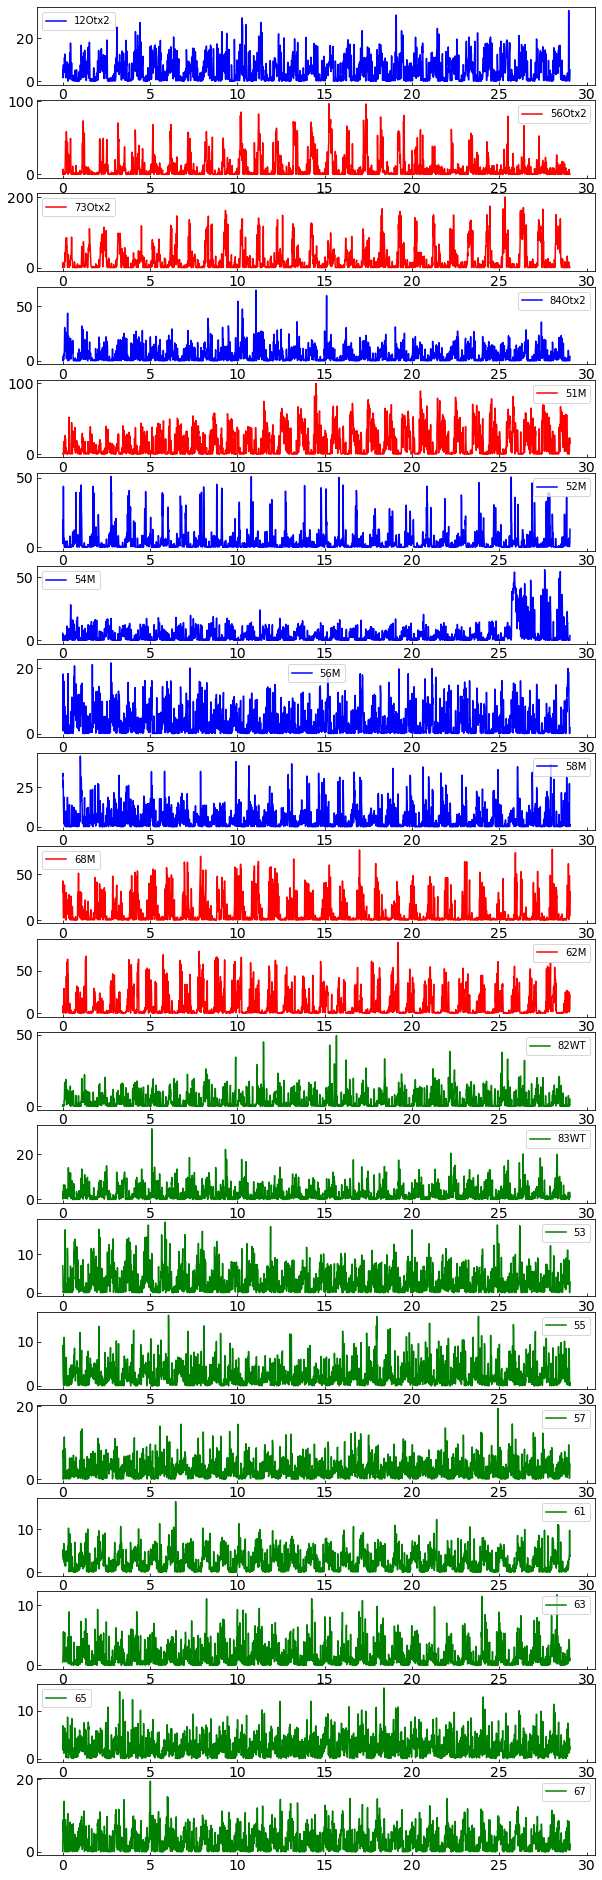

In [7]:
the_choosen_len = 2790
    
fignum = len(metadata.index)

fig, axes = plt.subplots(fignum, 1, figsize=(10,34))

for i in range(fignum):
    oridata = np.genfromtxt(path+metadata.index[i]+"_activity_reduce.txt")
    
    x = np.arange(the_choosen_len)
    x = x / 4 / 24
    
    if (metadata.loc[metadata.index[i], 'type'] == 'control'):
        color = 'g'
    elif (metadata.loc[metadata.index[i], 'type'] == 'mutant'):
        color = 'b'
    else:
        color = 'r'
    axes[i].plot(x, oridata[:the_choosen_len], color=color, label=metadata.index[i])
    axes[i].legend(loc='best')

fig.savefig("activity_overview_all.pdf")

In [34]:
metadata

type  offset  period var  period stderr  period mean  \
mouse                                                             
12Otx2   mutant       0    0.460927       0.050187    23.904416   
56Otx2    hyper       0    0.586536       0.056614    23.856315   
73Otx2    hyper       0    0.332018       0.042595    23.736746   
84Otx2   mutant       0    0.473526       0.050868    23.866233   
51M       hyper      46    0.948115       0.071979    24.045094   
52M      mutant      53    0.629699       0.058660    23.646719   
54M      mutant      31    1.268038       0.083242    23.983587   
56M      mutant      54    1.313678       0.084726    23.733595   
58M      mutant      45    0.996315       0.073786    24.126380   
68M       hyper      80    0.554401       0.055041    23.954085   
62M       hyper      69    1.491114       0.090267    24.018707   
82WT    control       0    0.576987       0.056151    24.150514   
83WT    control       0    0.397693       0.046617    24.000484   
53      control      45    0.531152       0.053875    23.765230   
55      control      46    0.437551       0.048898    24.112502   
57      control      45    0.659080       0.060013    24.115947   
61      control      89    0.307543       0.040995    24.009957   
63      control      86    0.472264       0.050800    24.008970   
65      control      85    0.360338       0.044374    24.056599   
67      control      90    0.538123       0.054227    24.069171   

        period pre var  period pre stderr  period pre mean  period aft var  \
mouse                                                                        
12Otx2        0.598957           0.057210        24.013372        0.301039   
56Otx2        0.627185           0.058543        23.883155        0.544912   
73Otx2        0.497585           0.052144        23.720606        0.167738   
84Otx2        0.533387           0.053988        23.935832        0.404786   
51M           1.430515           0.088414        24.107172        0.463376   
52M           0.773607           0.065018        23.750582        0.466130   
54M           0.569125           0.055767        24.013030        1.957648   
56M           1.740841           0.097534        23.820493        0.876300   
58M           1.066090           0.076326        23.993955        0.892796   
68M           0.506377           0.052603        24.024225        0.592224   
62M           1.487953           0.090171        24.170772        1.448745   
82WT          0.756769           0.064307        24.342371        0.326737   
83WT          0.416493           0.047707        24.109973        0.355511   
53            0.378635           0.045487        23.816837        0.676772   
55            0.559668           0.055302        24.112101        0.316761   
57            0.835865           0.067584        24.163727        0.479725   
61            0.202326           0.033251        23.980831        0.409947   
63            0.319446           0.041780        24.045363        0.620815   
65            0.322947           0.042009        24.157740        0.377196   
67            0.535030           0.054071        24.089368        0.540380   

        period aft stderr  period aft mean  
mouse                                       
12Otx2           0.040559        23.796643  
56Otx2           0.054568        23.829768  
73Otx2           0.030275        23.752711  
84Otx2           0.047031        23.797391  
51M              0.050320        23.983690  
52M              0.050469        23.543986  
54M              0.103429        23.954465  
56M              0.069199        23.647642  
58M              0.069847        24.257366  
68M              0.056888        23.884707  
62M              0.088975        23.868294  
82WT             0.042255        23.960741  
83WT             0.044076        23.892186  
53               0.060813        23.714185  
55               0.041605        24.112899  
57               0.051200        24.068686  
61       

In [54]:
hypertype = metadata.loc[metadata ['type'] == 'hyper']
mutanttype = metadata.loc[metadata ['type'] == 'mutant']
controltype = metadata.loc[metadata ['type'] == 'control']

In [25]:
from scipy.stats import ttest_ind

In [26]:
print ('period var [control vs. mutant]', ttest_ind(controltype['period stderr'], mutanttype['period stderr']))

print ('period var [hyper vs. mutant]', ttest_ind(hypertype['period stderr'], mutanttype['period stderr']))

print ('period var [control vs. hyper]', ttest_ind(controltype['period stderr'], hypertype['period stderr']))

period var [control vs. mutant] Ttest_indResult(statistic=-2.5756472586632, pvalue=0.02304592217136896)
period var [hyper vs. mutant] Ttest_indResult(statistic=0.05712690035873399, pvalue=0.9556923128461479)
period var [control vs. hyper] Ttest_indResult(statistic=-2.414974400231142, pvalue=0.03261531898476358)


In [27]:
print ('period mean [control vs. mutant]', ttest_ind(controltype['period mean'], mutanttype['period mean']))

print ('period mean [hyper vs. mutant]', ttest_ind(hypertype['period mean'], mutanttype['period mean']))

print ('period mean [control vs. hyper]', ttest_ind(controltype['period mean'], hypertype['period mean']))

period mean [control vs. mutant] Ttest_indResult(statistic=2.261835564281137, pvalue=0.04149022627695593)
period mean [hyper vs. mutant] Ttest_indResult(statistic=0.393606712243349, pvalue=0.7030335897183797)
period mean [control vs. hyper] Ttest_indResult(statistic=1.4472733735748016, pvalue=0.17343556266934124)


In [28]:
x = [1, 2, 3]

error_plot_data = [[
    metadata.loc[metadata ['type'] == 'control']['period stderr'].mean(),
    metadata.loc[metadata ['type'] == 'mutant']['period stderr'].mean(),
    metadata.loc[metadata ['type'] == 'hyper']['period stderr'].mean(),
    ], [
    metadata.loc[metadata ['type'] == 'control']['period stderr'].std() / np.sqrt(len(metadata.loc[metadata ['type'] == 'control'])),
    metadata.loc[metadata ['type'] == 'mutant']['period stderr'].std() / np.sqrt(len(metadata.loc[metadata ['type'] == 'mutant'])),
    metadata.loc[metadata ['type'] == 'hyper']['period stderr'].std() / np.sqrt(len(metadata.loc[metadata ['type'] == 'hyper'])),
    ]]

x, error_plot_data

([1, 2, 3],
 [[0.07322080272259185, 0.09955322757817099, 0.10042779594053904],
  [0.005293092203576613, 0.009788483028921892, 0.011996544523723179]])

/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


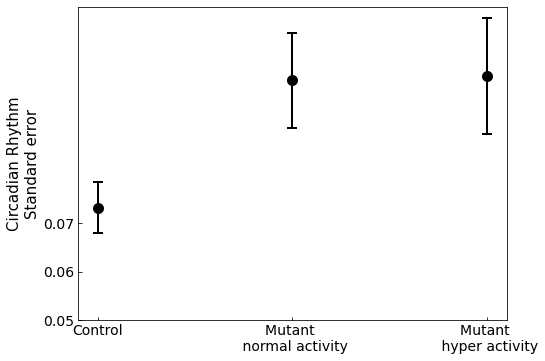

In [29]:
figsize = np.array([6.4, 4.8]) * 1.2

fig = plt.figure(figsize=figsize)

plt.tight_layout()

plt.errorbar(x, error_plot_data[0], 
             xerr=None,
             yerr=error_plot_data[1],
             marker='o',
             markersize=10,
             elinewidth=2,
             capthick=2,
             capsize=5,
             color='k',
             ls='None')
# plt.axhline(y=24, color='k', linestyle='--')
# plt.ylim(23,25)

ax = fig.add_subplot(111)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels([
    'Control',
    'Mutant \n normal activity', 
    'Mutant \n hyper activity'
])

ax.set_yticks(np.arange(0.05, 0.07, 0.01))
# ax.set_yticklabels([
#     'Control',
#     'Mutant - normal activity', 
#     'Mutant - hyper activity'
# ])

plt.ylabel('Circadian Rhythm\nStandard error')

plt.savefig('circadian_stderr.pdf')

# plt.legend(loc='lower right')

In [52]:
def circadian_period_testplot(hypertype, mutanttype, controltype):
    from scipy.stats import ttest_ind
    
    print ('significance t-test: [whole]')
    print ('period var [control vs. mutant]', ttest_ind(controltype['period stderr'], mutanttype['period stderr']))
    print ('period var [hyper vs. mutant]', ttest_ind(hypertype['period stderr'], mutanttype['period stderr']))
    print ('period var [control vs. hyper]', ttest_ind(controltype['period stderr'], hypertype['period stderr']))
    
    print ('period mean [control vs. mutant]', ttest_ind(controltype['period mean'], mutanttype['period mean']))
    print ('period mean [hyper vs. mutant]', ttest_ind(hypertype['period mean'], mutanttype['period mean']))
    print ('period mean [control vs. hyper]', ttest_ind(controltype['period mean'], hypertype['period mean']))
    
    x = [1, 2, 3]
    error_plot_data = [[
        controltype['period stderr'].mean(),
        mutanttype['period stderr'].mean(),
        hypertype['period stderr'].mean(),
        ], [
        controltype['period stderr'].std() / np.sqrt(len(controltype)),
        mutanttype['period stderr'].std() / np.sqrt(len(mutanttype)),
        hypertype['period stderr'].std() / np.sqrt(len(hypertype)),
        ]]
    period_stat_plot(x, error_plot_data, filename='circadian_stderr', label='Stderr')

    error_plot_data = [[
        controltype['period mean'].mean(),
        mutanttype['period mean'].mean(),
        hypertype['period mean'].mean(),
        ], [
        controltype['period mean'].std() / np.sqrt(len(controltype)),
        mutanttype['period mean'].std() / np.sqrt(len(mutanttype)),
        hypertype['period mean'].std() / np.sqrt(len(hypertype)),
        ]]
    period_stat_plot(x, error_plot_data, filename='circadian_average')
    
    print ('significance t-test: [former part]')
    print ('period var [control vs. mutant]', ttest_ind(controltype['period pre stderr'], mutanttype['period pre stderr']))
    print ('period var [hyper vs. mutant]', ttest_ind(hypertype['period pre stderr'], mutanttype['period pre stderr']))
    print ('period var [control vs. hyper]', ttest_ind(controltype['period pre stderr'], hypertype['period pre stderr']))
    
    print ('period mean [control vs. mutant]', ttest_ind(controltype['period pre mean'], mutanttype['period pre mean']))
    print ('period mean [hyper vs. mutant]', ttest_ind(hypertype['period pre mean'], mutanttype['period pre mean']))
    print ('period mean [control vs. hyper]', ttest_ind(controltype['period pre mean'], hypertype['period pre mean']))
    error_plot_data = [[
        controltype['period pre stderr'].mean(),
        mutanttype['period pre stderr'].mean(),
        hypertype['period pre stderr'].mean(),
        ], [
        controltype['period pre stderr'].std() / np.sqrt(len(controltype)),
        mutanttype['period pre stderr'].std() / np.sqrt(len(mutanttype)),
        hypertype['period pre stderr'].std() / np.sqrt(len(hypertype)),
        ]]
    period_stat_plot(x, error_plot_data, filename='circadian_pre_stderr', label='Stderr')

    error_plot_data = [[
        controltype['period pre mean'].mean(),
        mutanttype['period pre mean'].mean(),
        hypertype['period pre mean'].mean(),
        ], [
        controltype['period pre mean'].std() / np.sqrt(len(controltype)),
        mutanttype['period pre mean'].std() / np.sqrt(len(mutanttype)),
        hypertype['period pre mean'].std() / np.sqrt(len(hypertype)),
        ]]
    period_stat_plot(x, error_plot_data, filename='circadian_pre_average')
    
    print ('significance t-test: [latter part]')
    print ('period var [control vs. mutant]', ttest_ind(controltype['period aft stderr'], mutanttype['period aft stderr']))
    print ('period var [hyper vs. mutant]', ttest_ind(hypertype['period aft stderr'], mutanttype['period aft stderr']))
    print ('period var [control vs. hyper]', ttest_ind(controltype['period aft stderr'], hypertype['period aft stderr']))
    
    print ('period mean [control vs. mutant]', ttest_ind(controltype['period aft mean'], mutanttype['period aft mean']))
    print ('period mean [hyper vs. mutant]', ttest_ind(hypertype['period aft mean'], mutanttype['period aft mean']))
    print ('period mean [control vs. hyper]', ttest_ind(controltype['period aft mean'], hypertype['period aft mean']))
    error_plot_data = [[
        controltype['period aft stderr'].mean(),
        mutanttype['period aft stderr'].mean(),
        hypertype['period aft stderr'].mean(),
        ], [
        controltype['period aft stderr'].std() / np.sqrt(len(controltype)),
        mutanttype['period aft stderr'].std() / np.sqrt(len(mutanttype)),
        hypertype['period aft stderr'].std() / np.sqrt(len(hypertype)),
        ]]
    period_stat_plot(x, error_plot_data, filename='circadian_aft_stderr', label='Stderr')

    error_plot_data = [[
        controltype['period aft mean'].mean(),
        mutanttype['period aft mean'].mean(),
        hypertype['period aft mean'].mean(),
        ], [
        controltype['period aft mean'].std() / np.sqrt(len(controltype)),
        mutanttype['period aft mean'].std() / np.sqrt(len(mutanttype)),
        hypertype['period aft mean'].std() / np.sqrt(len(hypertype)),
        ]]
    period_stat_plot(x, error_plot_data, filename='circadian_aft_average')
    
    print('done')

significance t-test: [whole]
period var [control vs. mutant] Ttest_indResult(statistic=-2.8425112879406824, pvalue=0.013854416135569671)
period var [hyper vs. mutant] Ttest_indResult(statistic=-0.3522995471361471, pvalue=0.7327225772617262)
period var [control vs. hyper] Ttest_indResult(statistic=-1.9397835200463995, pvalue=0.07627276600680878)
period mean [control vs. mutant] Ttest_indResult(statistic=2.1220784738950718, pvalue=0.05361730933517946)
period mean [hyper vs. mutant] Ttest_indResult(statistic=0.487953222526394, pvalue=0.6372499112607141)
period mean [control vs. hyper] Ttest_indResult(statistic=1.671664693232302, pvalue=0.12044179992838405)
significance t-test: [former part]
period var [control vs. mutant] Ttest_indResult(statistic=-2.436092317796037, pvalue=0.029986087824720377)
period var [hyper vs. mutant] Ttest_indResult(statistic=0.06761939508295826, pvalue=0.9475670223414107)
period var [control vs. hyper] Ttest_indResult(statistic=-2.270214567665571, pvalue=0.042421

/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous

significance t-test: [latter part]
period var [control vs. mutant] Ttest_indResult(statistic=-1.7333005221994127, pvalue=0.10667910618253573)
period var [hyper vs. mutant] Ttest_indResult(statistic=-0.5379263613810091, pvalue=0.6036734938497276)
period var [control vs. hyper] Ttest_indResult(statistic=-0.895294171507235, pvalue=0.38823577963645506)
period mean [control vs. mutant] Ttest_indResult(statistic=1.4753387238473485, pvalue=0.16392662380162049)
period mean [hyper vs. mutant] Ttest_indResult(statistic=0.2613040659330428, pvalue=0.7997393851095697)
period mean [control vs. hyper] Ttest_indResult(statistic=1.8216908067799724, pvalue=0.09350713737918792)
done


/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous

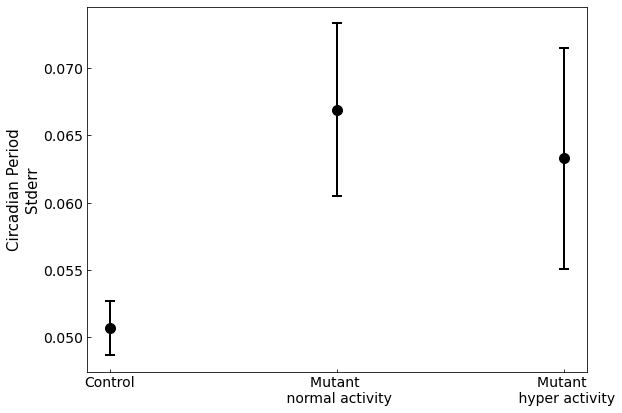

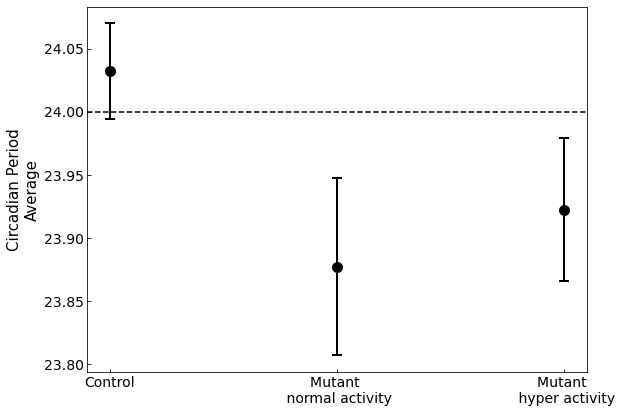

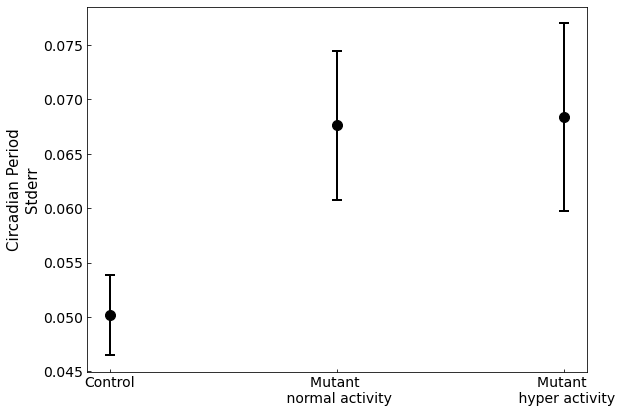

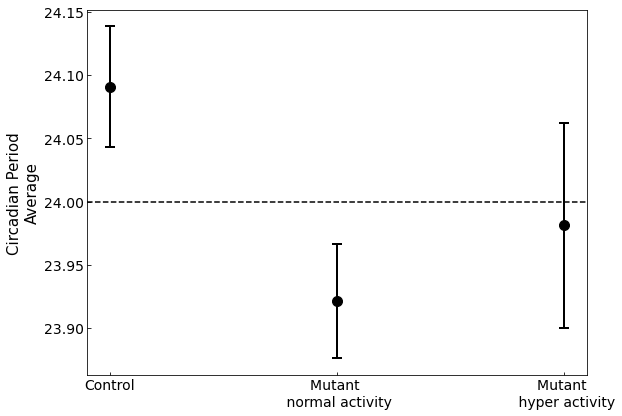

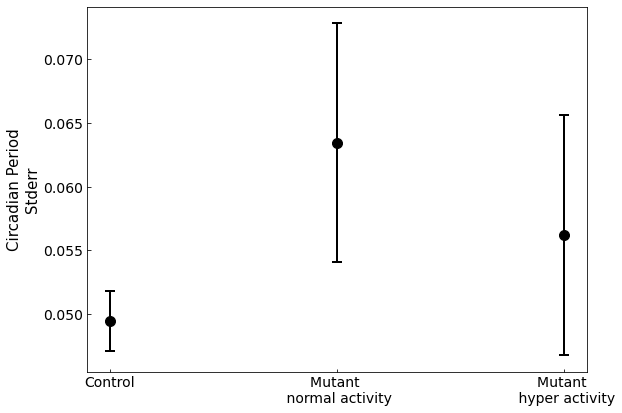

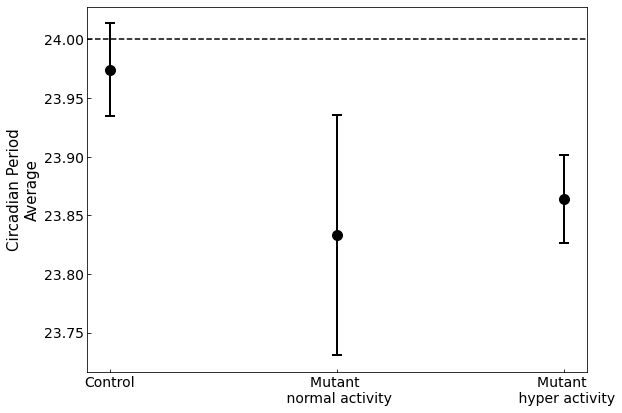

In [55]:
circadian_period_testplot(hypertype, mutanttype, controltype)

In [44]:
x = [1, 2, 3]

error_plot_data = [[
    metadata.loc[metadata ['type'] == 'control']['period mean'].mean(),
    metadata.loc[metadata ['type'] == 'mutant']['period mean'].mean(),
    metadata.loc[metadata ['type'] == 'hyper']['period mean'].mean(),
    ], [
    metadata.loc[metadata ['type'] == 'control']['period mean'].std() / np.sqrt(len(metadata.loc[metadata ['type'] == 'control'])),
    metadata.loc[metadata ['type'] == 'mutant']['period mean'].std() / np.sqrt(len(metadata.loc[metadata ['type'] == 'mutant'])),
    metadata.loc[metadata ['type'] == 'hyper']['period mean'].std() / np.sqrt(len(metadata.loc[metadata ['type'] == 'hyper'])),
    ]]

x, error_plot_data

([1, 2, 3],
 [[24.032152553126895, 23.876821811475406, 23.922189312568307],
  [0.03777404961775564, 0.07024075586390267, 0.05664233030150852]])

In [48]:
def period_stat_plot(x, y, filename, label='Average', figsize=None):
    if figsize is None:
        figsize = np.array([6.4, 4.8]) * 1.4

    fig = plt.figure(figsize=figsize)
    plt.tight_layout()
    plt.errorbar(x, y[0], 
                 xerr=None,
                 yerr=y[1],
                 marker='o',
                 markersize=10,
                 elinewidth=2,
                 capthick=2,
                 capsize=5,
                 color='k',
                 ls='None')
    if label == 'Average':
        plt.axhline(y=24, color='k', linestyle='--')

    ax = fig.add_subplot(111)

    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels([
        'Control',
        'Mutant \n normal activity', 
        'Mutant \n hyper activity'
    ])

    plt.ylabel('Circadian Period\n{}'.format(label))

    plt.savefig(f'{filename}.pdf')

/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


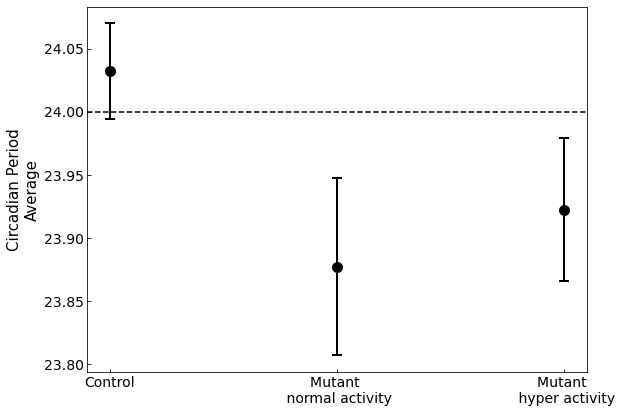

In [49]:
period_stat_plot(x, error_plot_data, filename='circadian_average')

ValueError: 'x' and 'y' must have the same size

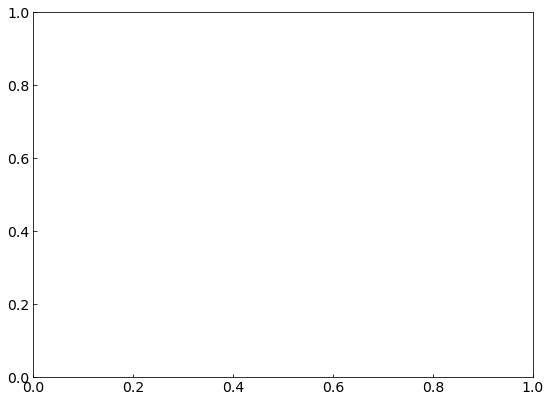

In [43]:
figsize = np.array([6.4, 4.8]) * 1.4

fig = plt.figure(figsize=figsize)

plt.tight_layout()

plt.errorbar(x, error_plot_data[0], 
             xerr=None,
             yerr=error_plot_data[1],
             marker='o',
             markersize=10,
             elinewidth=2,
             capthick=2,
             capsize=5,
             color='k',
             ls='None')
plt.axhline(y=24, color='k', linestyle='--')
# plt.ylim(23,25)

ax = fig.add_subplot(111)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels([
    'Control',
    'Mutant \n normal activity', 
    'Mutant \n hyper activity'
])

plt.ylabel('Circadian Rhythm\nAverage')

plt.savefig('circadian_average.pdf')

# plt.legend(loc='lower right')

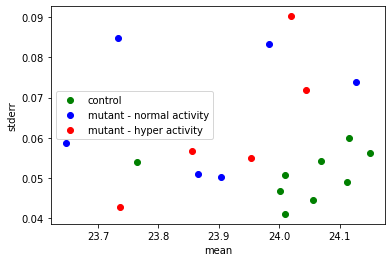

In [8]:
control_circadian = metadata.loc[metadata ['type'] == 'control'][['period mean', 'period stderr']]
mutant_circadian = metadata.loc[metadata ['type'] == 'mutant'][['period mean', 'period stderr']]
hyper_circadian = metadata.loc[metadata ['type'] == 'hyper'][['period mean', 'period stderr']]

plt.scatter(x = control_circadian['period mean'].values,
           y = control_circadian['period stderr'].values,
           label = 'control',
           color = 'g')

plt.scatter(x = mutant_circadian['period mean'].values,
           y = mutant_circadian['period stderr'].values,
           label = 'mutant - normal activity',
           color = 'b')

plt.scatter(x = hyper_circadian['period mean'].values,
           y = hyper_circadian['period stderr'].values,
           label = 'mutant - hyper activity',
           color = 'r')

plt.xlabel('mean')

plt.ylabel('stderr')

plt.legend(loc='best')

plt.savefig('circadian_scatter_plot.pdf')

In [16]:
control_circadian['period mean'].values

array([24.15051354, 24.00048416, 23.76523033, 24.11250214, 24.11594692,
       24.00995698, 24.00896964, 24.05659865, 24.06917062])

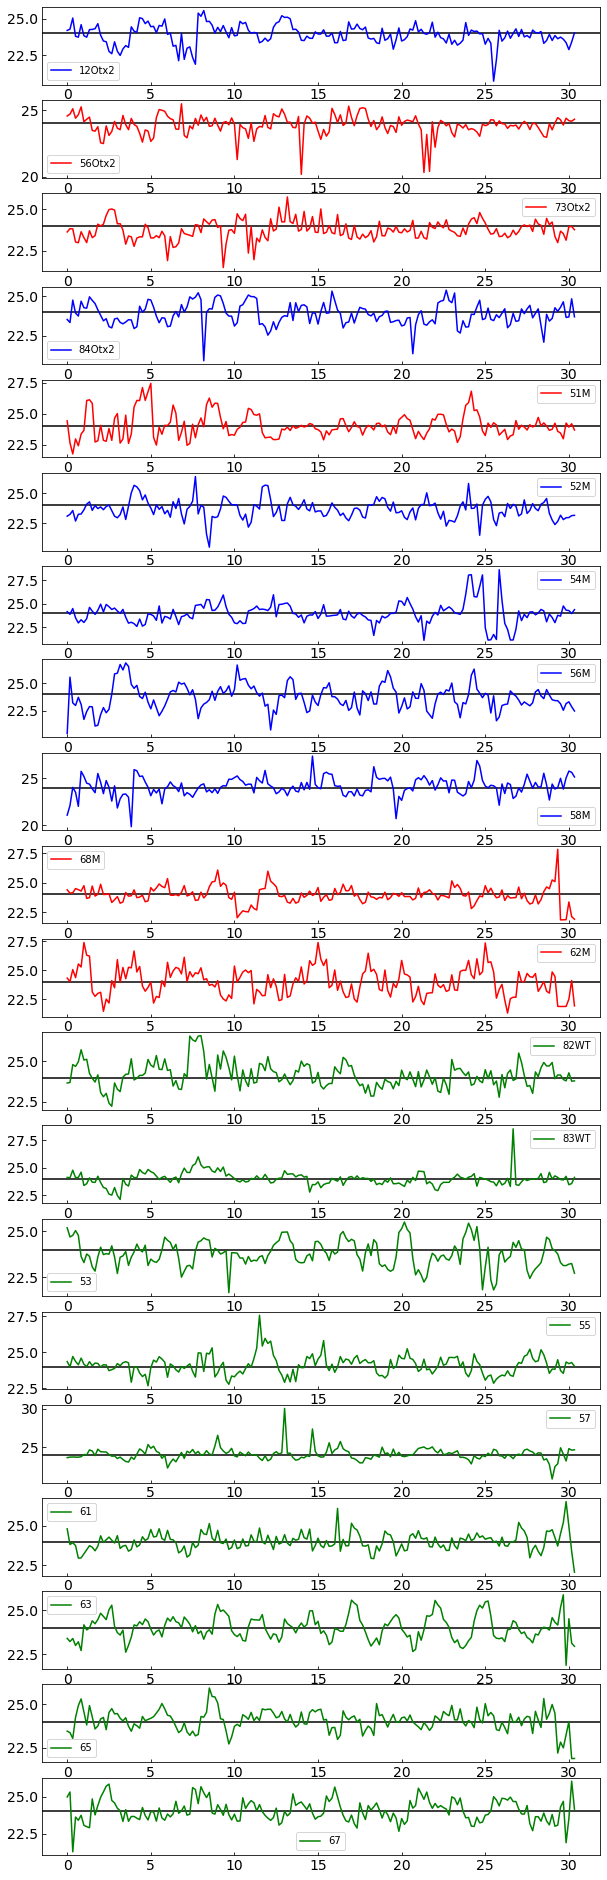

In [33]:
start = 10
the_choosen_len = 193

fignum = len(metadata.index)

fig, axes = plt.subplots(fignum, 1, figsize=(10,34))

for i in range(fignum):
    oridata = np.genfromtxt(path+metadata.index[i]+"_circadian.txt")
    
#     the_choosen_len = len(oridata)

    begin = start
    end = the_choosen_len
    
    metadata.loc[metadata.index[i], 'period var'] = np.var(oridata[begin:end, 1])
    metadata.loc[metadata.index[i], 'period stderr'] = np.std(oridata[begin:end, 1]) / np.sqrt(the_choosen_len - start)
    metadata.loc[metadata.index[i], 'period mean'] = np.mean(oridata[begin:end, 1])
    
    begin = start
    end = int ((the_choosen_len + start) * 0.5)
    
    metadata.loc[metadata.index[i], 'period pre var'] = np.var(oridata[begin:end, 1])
    metadata.loc[metadata.index[i], 'period pre stderr'] = np.std(oridata[begin:end, 1]) / np.sqrt(the_choosen_len - start)
    metadata.loc[metadata.index[i], 'period pre mean'] = np.mean(oridata[begin:end, 1])
    
    begin = end
    end = the_choosen_len

    metadata.loc[metadata.index[i], 'period aft var'] = np.var(oridata[begin:end, 1])
    metadata.loc[metadata.index[i], 'period aft stderr'] = np.std(oridata[begin:end, 1]) / np.sqrt(the_choosen_len - start)
    metadata.loc[metadata.index[i], 'period aft mean'] = np.mean(oridata[begin:end, 1])

    x = np.arange(the_choosen_len - start)
    x = x / 6

    if (metadata.loc[metadata.index[i], 'type'] == 'control'):
        color = 'g'
    elif (metadata.loc[metadata.index[i], 'type'] == 'mutant'):
        color = 'b'
    else:
        color = 'r'

    axes[i].axhline(y=24, color='k', linestyle='-')
    axes[i].plot(x, oridata[start:the_choosen_len,1], color=color, label=metadata.index[i])

    axes[i].legend(loc='best')

fig.savefig("circadian_rhythm_all.pdf")

NameError: name 'find_nearest' is not defined

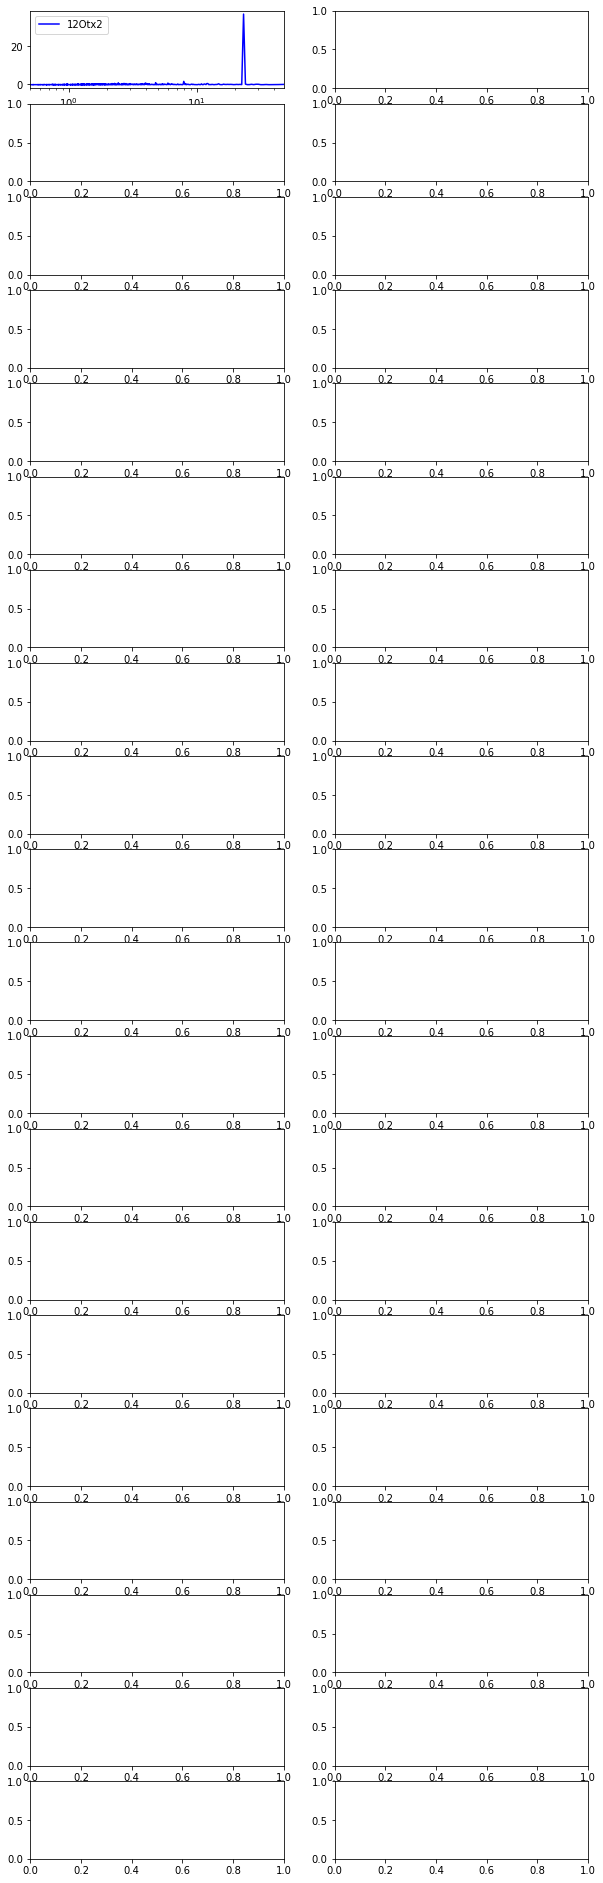

In [53]:

the_choosen_len = 2790

fignum = len(metadata.index)

fig, axes = plt.subplots(fignum, 2, figsize=(10,34))

for i in range(fignum):
    oridata = np.genfromtxt(path+metadata.index[i]+"_activity_reduce.txt")

    if (metadata.loc[metadata.index[i], 'type'] == 'control'):
        color = 'g'
    elif (metadata.loc[metadata.index[i], 'type'] == 'mutant'):
        color = 'b'
    else:
        color = 'r'

    data = np.square(np.abs(np.fft.rfft(oridata-np.mean(oridata))))
    data = data - np.mean(data)
    
    data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x

    axes[i][0].plot(x, data, color, label=metadata.index[i])
    axes[i][0].set_xscale('log')
    axes[i][0].legend(loc='best')
    axes[i][0].set_xlim(np.min(x),48)

    idx = np.where(x == find_nearest(x, 24))[0][0]
    axes[i][0].annotate('24 h',
            xy=(24, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.95, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')
    idx = np.where(x == find_nearest(x, 12))[0][0]
    axes[i][0].annotate('12 h',
            xy=(12, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.75, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')
    idx = np.where(x == find_nearest(x, 8))[0][0]
    axes[i][0].annotate('8 h',
            xy=(8, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.6, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')
    idx = np.where(x == find_nearest(x, 6))[0][0]
    axes[i][0].annotate('6 h',
            xy=(6, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.5, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')

    length = len(oridata) // 96 * 96
    data = np.array(oridata[:length])
    days = length // 96
    data = data[:length]
    # data = data - data.mean()
    # data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    offset = 10
    data = np.concatenate([average[offset:], average[:offset]])
    x = np.arange(0, 24, 24/len(data))
    xticks = np.arange(0, 24+0.001, 4)
    axes[i][1].plot(x, data, color)
    axes[i][1].set_xticks(xticks)
    axes[i][1].axvspan(0,12, alpha=0.3)
    # print (i, metadata.index[i])
fig.savefig("spectrurm_waveform_all.pdf")

In [61]:
x[np.where(x == find_nearest(x, 12))]

array([12.])

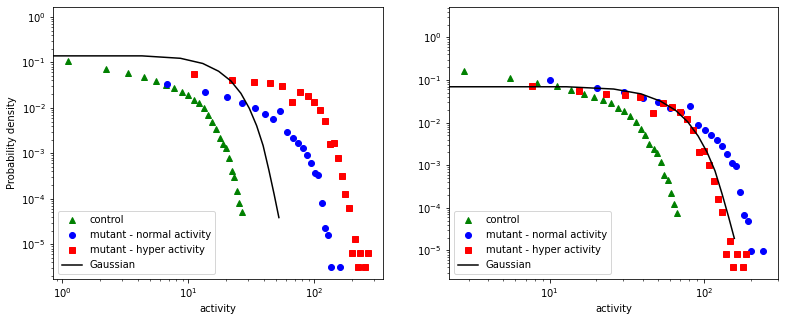

In [13]:
draw_probability_density(30)

In [38]:
def draw_circadian_overview(path: str):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    the_choosen_len = 180

    control_data = np.genfromtxt(path+control_mouse+"_circadian.txt")
    mutant_data = np.genfromtxt(path+mutant_mouse+"_circadian.txt")
    hyper_data = np.genfromtxt(path+hyper_mouse+"_circadian.txt")

    x = np.arange(the_choosen_len)
    x = x / 6
    
    figsize = np.array([6.4, 4.8]) * np.array([2.0, 1.2])

    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3,1, hspace=0.0, wspace = 0.0)
    
    ax = fig.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylabel('Circadian period', labelpad=20)
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    plt.subplots_adjust(left=0.15)
    
    control_plot = fig.add_subplot(gs[0,0])
    mutant_plot = fig.add_subplot(gs[1,0], sharex=control_plot, sharey=control_plot)
    hyper_plot = fig.add_subplot(gs[2,0], sharex=control_plot, sharey=control_plot)

    mrhythm = max(max(mutant_data[:,1]), max(control_data[:,1]), max(hyper_data[:,1]))
    srhythm = min(min(mutant_data[:,1]), min(control_data[:,1]), min(hyper_data[:,1]))

    # control_plot.set_ylim(srhythm, mrhythm)
    handle1, = control_plot.plot(x, control_data[:the_choosen_len,1], 'g', label="control")
    control_plot.axhline(y=24, color='k', linestyle='-')
    control_plot.tick_params(axis='both', direction='in')
    control_plot
    # mutant_plot.set_ylim(srhythm, mrhythm)
    handle2, = mutant_plot.plot(x, mutant_data[:the_choosen_len,1], 'b', label="mutant - normal activity")
    mutant_plot.axhline(y=24, color='k', linestyle='-')
    # mutant_plot.tick_params(axis='both', direction='in')
    # hyper_plot.set_ylim(srhythm, mrhythm)
    handle3, = hyper_plot.plot(x, hyper_data[:the_choosen_len,1], 'r', label="mutant - hyper activity")
    hyper_plot.axhline(y=24, color='k', linestyle='-')
    hyper_plot.tick_params(axis='both', direction='in')
    hyper_plot.set_xlabel("day")
    
    control_plot.secondary_xaxis("top").tick_params(labeltop=False)
    mutant_plot.secondary_xaxis("top").tick_params(labeltop=False)
    hyper_plot.secondary_xaxis("top").tick_params(labeltop=False)
    
    control_plot.legend(loc='lower left', frameon=False, fontsize=16)
    mutant_plot.legend(loc='lower left', frameon=False, fontsize=16)
    hyper_plot.legend(loc='lower left', frameon=False, fontsize=16)
    
#     control_plot.legend(handles=[handle1, handle2, handle3], loc='upper right')

    # fig.legend(loc='upper right')
    figname = 'circadian_rhythm_overview.pdf'
    fig.savefig(figname)
    print("figsave: ", figname)


figsave:  circadian_rhythm_overview.pdf


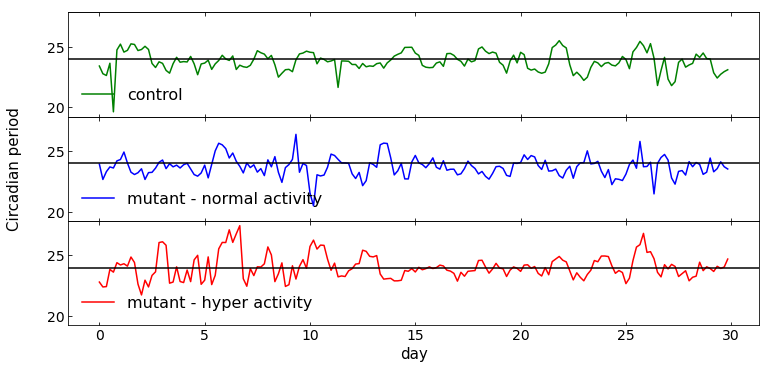

In [41]:
path = "./"

control_mouse = "53"
mutant_mouse = "52M"
hyper_mouse = "51M"

draw_circadian_overview(path)

In [11]:
def draw_activity_overview():
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    the_choosen_len = 2790

    control_data = np.genfromtxt(path+control_mouse+"_activity_reduce.txt")
    mutant_data = np.genfromtxt(path+mutant_mouse+"_activity_reduce.txt")
    hyper_data = np.genfromtxt(path+hyper_mouse+"_activity_reduce.txt")

    x = np.arange(the_choosen_len)
    x = x / 4 / 24

    fig = plt.figure(figsize=(8, 6))

    ax = fig.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylabel('Activity')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    gs = fig.add_gridspec(3,1, hspace=0.0, wspace = 0.01)
    control_plot = fig.add_subplot(gs[0])
    mutant_plot = fig.add_subplot(gs[1], sharex=control_plot, sharey=control_plot)
    hyper_plot = fig.add_subplot(gs[2], sharex=control_plot, sharey=control_plot)

    # mrhythm = max(max(mutant_data[:]), max(control_data[:]), max(hyper_data[:]))
    # srhythm = min(min(mutant_data[:]), min(control_data[:]), min(hyper_data[:]))

    # control_plot.set_ylim(srhythm, mrhythm)
    handle1, = control_plot.plot(x, control_data[:the_choosen_len], 'g', label="control")
    control_plot.tick_params(axis='both', direction='in')
    # mutant_plot.set_ylim(srhythm, mrhythm)
    handle2, = mutant_plot.plot(x, mutant_data[:the_choosen_len], 'b', label="mutant - normal activity")
    mutant_plot.tick_params(axis='both', direction='in')
    # hyper_plot.set_ylim(srhythm, mrhythm)
    handle3, = hyper_plot.plot(x, hyper_data[:the_choosen_len], 'r', label="mutant - hyper activity")
    hyper_plot.tick_params(axis='both', direction='in')
    hyper_plot.set_xlabel("day")

    control_plot.legend(handles=[handle1, handle2, handle3], loc='upper right')

    figname = 'activity_overview.pdf'
    fig.savefig(figname)
    print("figsave: ", figname)
    


In [13]:
control_mouse,mutant_mouse,hyper_mouse

('53', '52M', '51M')

figsave:  activity_overview.pdf


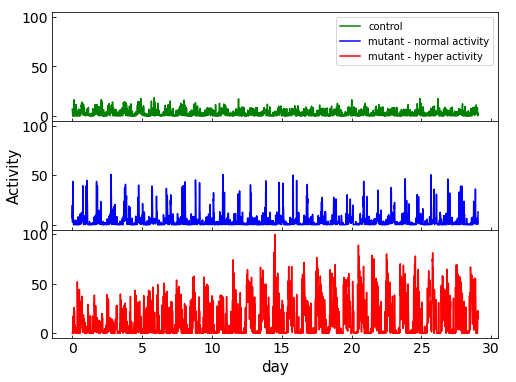

In [12]:
draw_activity_overview()

In [1]:
import tools.miceutil as mt

data_dict, smooth_data_dict = mt.mice_selected_data('../../causality/selected_data' )

12Otx2
56Otx2
73Otx2
84Otx2
51M
52M
54M
56M
58M
68M
62M
64M
82WT
83WT
53
55
57
61
63
65
67


In [15]:
control_conca, mutant_conca, hyper_conca = mt.batch_poolize(smooth_data_dict)

TypeError: batch_poolize() missing 1 required positional argument: 'metadata'

In [134]:
mu = np.mean(data_dict['52M'])
sd = np.std(data_dict['52M'])
surrogate = np.random.normal(mu, sd, len(data_dict['52M']))

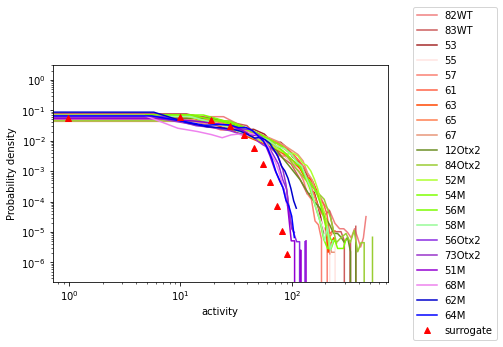

In [28]:
N=5
## Control

name = '82WT'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1
bin_edge *= 1.5
plt.plot(bin_edge[:-1], hist, 'lightcoral', label=name)

name = '83WT'
hist, bin_edge = np.histogram(data_dict[name], bins=20)
hist = hist / np.sum(hist)
hist *= 1.6
bin_edge *= 1.4
plt.plot(bin_edge[:-1], hist, 'indianred', label=name)

name = '53'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.9
bin_edge *= 3.5
plt.plot(bin_edge[:-1], hist, 'brown', label=name)

name = '55'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 3.7
plt.plot(bin_edge[:-1], hist, 'mistyrose', label=name)

name = '57'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 3.7
plt.plot(bin_edge[:-1], hist, 'salmon', label=name)

name = '61'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5.5
plt.plot(bin_edgecontrol
mutant normal
mutant hyper[:-1], hist, 'tomato', label=name)

name = '63'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5.8
plt.plot(bin_edge[:-1], hist, 'orangered', label=name)

name = '65'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5
plt.plot(bin_edge[:-1], hist, 'coral', label=name)

name = '67'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5
plt.plot(bin_edge[:-1], hist, 'darksalmon', label=name)

## Mutant
name = '12Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.7
bin_edge *= 1.6
plt.plot(bin_edge[:-1], hist, 'olivedrab', label=name)

name = '84Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.7
bin_edge *= 1.4
plt.plot(bin_edge[:-1], hist, 'yellowgreen', label=name)

name = '52M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.9
bin_edge *= 2
plt.plot(bin_edcontrol
mutant normal
mutant hyperge[:-1], hist, 'greenyellow', label=name)
control
mutant normal
mutant hyper
name = '54M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.9
bin_edge *= 1.7
plt.plot(bin_edge[:-1], hist, 'chartreuse', label=name)

name = '56M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.8
bin_edge *= 2.5
plt.plot(bin_edge[:-1], hist, 'lawngreen', label=name)

name = '58M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.8
bin_edge *= 1.8
plt.plot(bin_edge[:-1], hist, 'palegreen', label=name)

# Hyper
name = '56Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1.5
bin_edge *= 0.6
plt.plot(bin_edge[:-1], hist, 'blueviolet', label=name)

name = '73Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1
bin_edge *= 0.35
plt.plot(bin_edge[:-1], hist, 'darkorchid', label=name)

name = '51M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.8
bin_edge *= 0.55
plt.plot(bin_edge[:-1], hist, 'darkviolet', label=name)

name = '68M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1.4
bin_edge *= 0.7
plt.plot(bin_edge[:-1], hist, 'violet', label=name)

name = '62M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1.4
bin_edge *= 0.7
plt.plot(bin_edge[:-1], hist, 'mediumblue', label=name)

name = '64M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.92
bin_edge *= 0.6
plt.plot(bin_edge[:-1], hist, 'blue', label=name)

## Surrogate
data = np.convolve(surrogate, np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(surrogate, bins=20)
hist = hist / np.sum(hist)
hist *= 0.3
bin_edge *= 2.5
plt.plot(bin_edge[:-1], hist, 'r^', label='surrogate')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center')
plt.savefig('distribution_all.pdf', bbox_inches='tight')


In [133]:
N=5

fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(control_mouse)
control_data = np.genfromtxt(fullpath)[:,1]
control_data = np.convolve(control_data, np.ones(N)/N, mode='valid')

fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(mutant_mouse)
mutant_data = np.genfromtxt(fullpath)[:,1]
mutant_data = np.convolve(mutant_data, np.ones(N)/N, mode='valid')

fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(hyper_mouse)
hyper_data = np.genfromtxt(fullpath)[:,1]
hyper_data = np.convolve(hyper_data, np.ones(N)/N, mode='valid')

mu = np.mean(hyper_data)
sd = np.std(hyper_data)
surrogate = np.random.normal(mu, sd, len(mutant_data))
surrogate = np.convolve(surrogate, np.ones(N)/N, mode='valid')



In [8]:
np.unique(data_dict['12Otx2'])

array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
        66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.,
       132., 138., 144., 150., 156., 162., 168., 174., 180., 186., 192.,
       198., 204., 210., 216., 222., 228., 234., 240., 246., 252., 258.,
       264., 270., 276., 282., 288., 306., 324., 342.])

In [136]:
mu = np.mean(mutant_conca)
sd = np.std(mutant_conca)

surrogate = np.random.normal(mu, sd, len(mutant_conca))

1.0

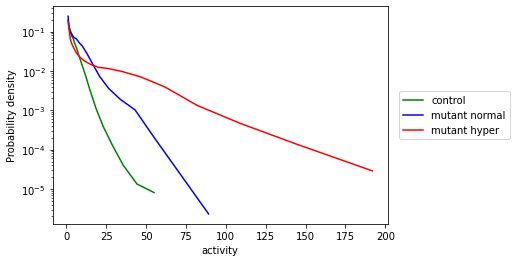

In [90]:

linear_bin_num = 20

bin_num = 20
bin_min = 0

# bins = np.arange(-1, 1, linear_bin_num)

data = control_conca * 1.0
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist = hist / np.sum(hist)
hist *= 1.0
plt.plot((bin_edge[1:] + bin_edge[:-1])*0.5, hist, 'g', label='control')

data = mutant_conca * 1.0 
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist *= 1.0
plt.plot((bin_edge[1:] + bin_edge[:-1])*0.5, hist, 'b', label='mutant normal')

data = hyper_conca * 1.0
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist *= 1.0
plt.plot((bin_edge[1:] + bin_edge[:-1])*0.5, hist, 'r', label='mutant hyper')

# data = surrogate
# bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
# hist, bin_edge = np.histogram(data, bins, density=True)
# hist *= 1.0
# plt.plot(bin_edge[:-1], hist, 'k', label='gaussian')

plt.yscale('log')
# plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center')
plt.savefig('distribution_all.pdf', bbox_inches='tight')
((bin_edge[1:] - bin_edge[:-1]) * hist).sum()

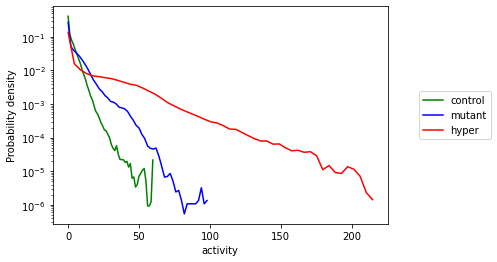

In [89]:

bin_num = 30
bin_min = -1

data = control_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
plt.plot(bin_edge[:-1], hist, 'g', label='control')

data = mutant_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
plt.plot(bin_edge[:-1], hist, 'b', label='mutant')

data = hyper_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
plt.plot(bin_edge[:-1], hist, 'r', label='hyper')

# data = surrogate * 5
# hist, bin_edge = np.histogram(data, bins=50, density=True)
# plt.plot(bin_edge[:-1], hist, 'k', label='gaussian')

plt.yscale('log')
# plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center')

In [32]:
((bin_edge[1:] - bin_edge[:-1]) * hist).sum()

0.9999999999999999

In [8]:
control_data = np.genfromtxt(path+"control_group_average_activiry.txt")
mutant_data = np.genfromtxt(path+"mutant_group_average_activiry.txt")
hyper_data = np.genfromtxt(path+"mutant_hyper_group_average_activiry.txt")

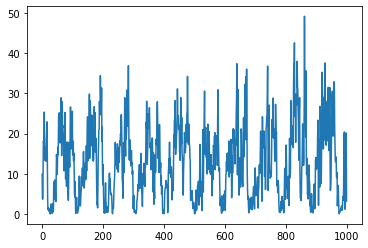

In [11]:
plt.plot(hyper_data[0:1000])

1.0

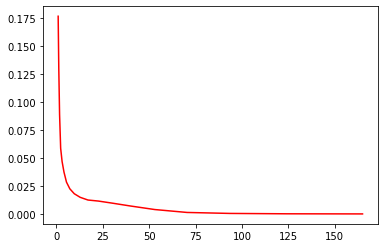

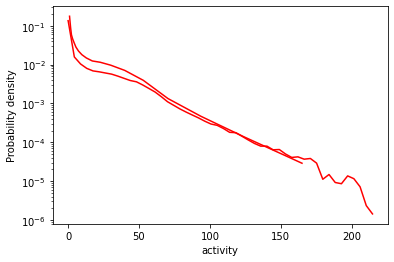

In [75]:

data = hyper_conca * 1.0
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist *= 1.0
plt.plot(bin_edge[:-1], hist, 'r', label='mutant hyper')
# print((bin_edge[1:] - bin_edge[:-1]) * hist).sum())


data = hyper_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
plt.plot(bin_edge[:-1], hist, 'r', label='hyper')
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.show()
# print((bin_edge[1:] - bin_edge[:-1]) * hist).sum())

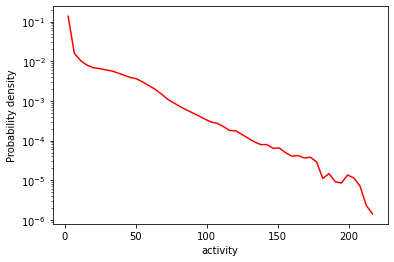

In [74]:
data = hyper_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
plt.plot((bin_edge[1:] + bin_edge[:-1])*0.5, hist, 'r', label='hyper')
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.show()

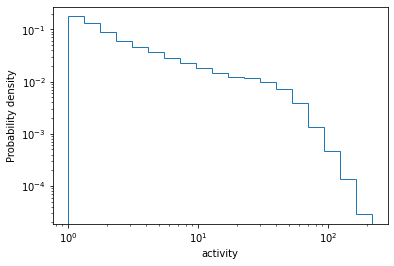

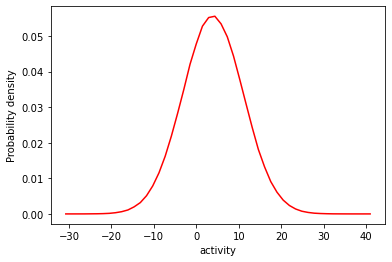

In [51]:
data = surrogate
hist, bin_edge = np.histogram(data, bins=50, density=True)
plt.plot(bin_edge[:-1], hist, 'r', label='hyper')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.show()

In [52]:
from scipy import stats

In [68]:
stats.kstest(hyper_conca, "norm")

KstestResult(statistic=0.5, pvalue=0.0)

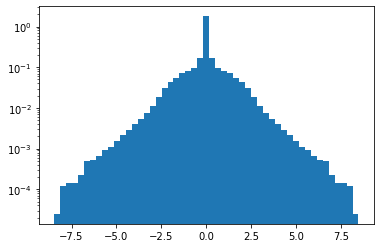

In [73]:
tempdata = hyper_conca.copy()
tempdata = np.concatenate([tempdata, -tempdata])
tempdata /= tempdata.std()
plt.hist(tempdata, bins=51, density=True)
plt.yscale("log")
plt.show()

In [56]:
stats.kstest(tempdata, 'norm')

KstestResult(statistic=0.27744224456192146, pvalue=0.0)

In [60]:
def my_cdf(x):
    if x < 0:
        return 0
    else:
        return (stats.norm.cdf(x) - 0.5) * 2

my_cdf = np.vectorize(my_cdf)

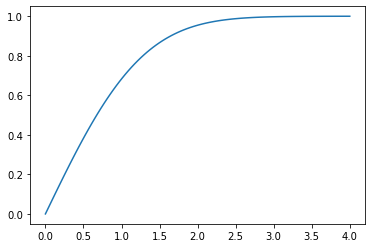

In [64]:
x = np.linspace(0, 4, 100)
test_cdf = my_cdf(x)
plt.plot(x, test_cdf)

0 12Otx2
1 56Otx2
2 73Otx2
3 84Otx2
4 51M
5 52M
6 54M
7 56M
8 58M
9 68M
10 62M
11 64M
12 82WT
13 83WT
14 53
15 55
16 57
17 61
18 63
19 65
20 67


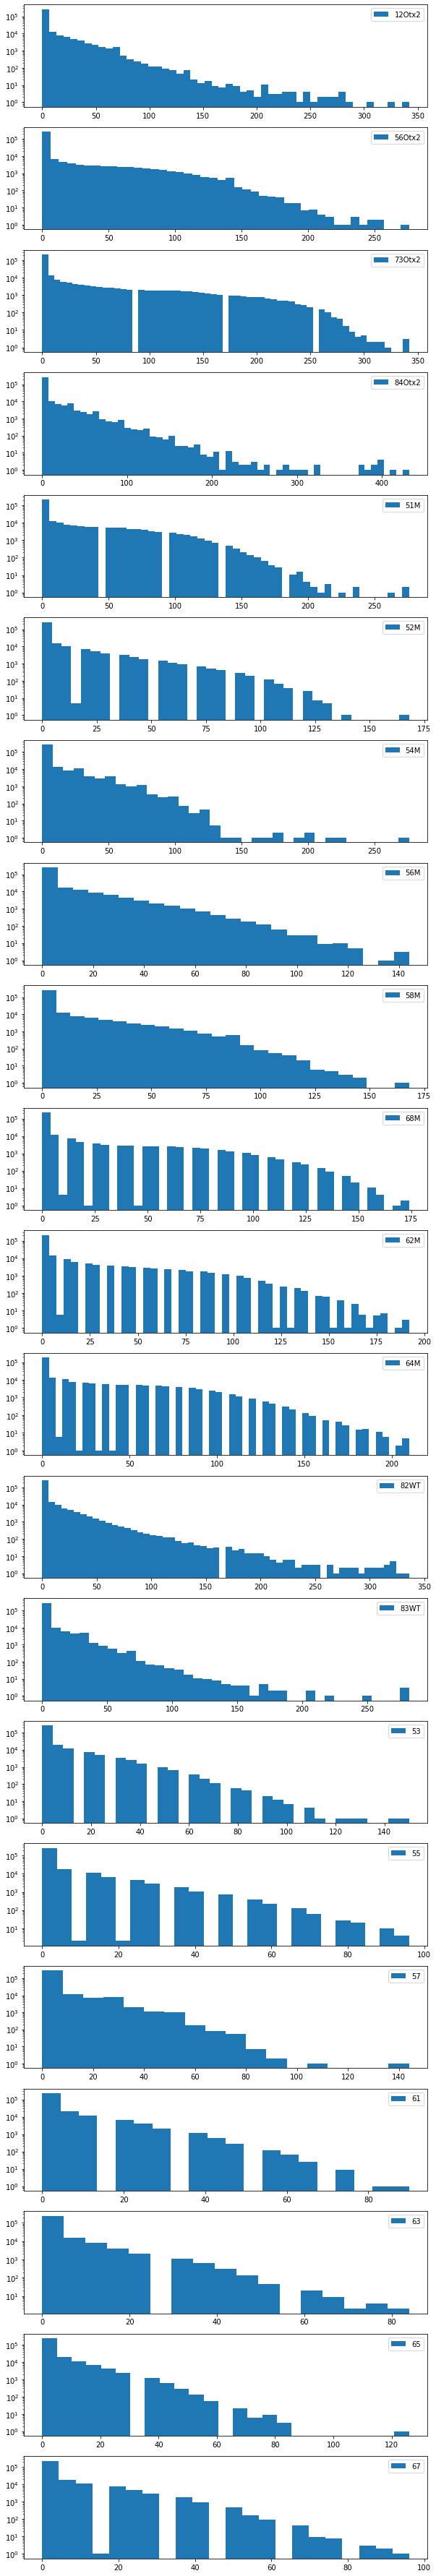

In [157]:
fignum = len(metadata.index)

fig, axes = plt.subplots(fignum, 1, figsize=(10,65))

for i in range(fignum):
    oridata = data_dict[metadata.index[i]].copy()

    if (metadata.loc[metadata.index[i], 'type'] == 'control'):
        color = 'g'
    elif (metadata.loc[metadata.index[i], 'type'] == 'mutant'):
        color = 'b'
    else:
        color = 'r'

    # oridata /= 6

    axes[i].hist(oridata[oridata>=0], bins=len(np.unique(oridata)), label=metadata.index[i])
    axes[i].set_yscale('log')
    # axes[i].set_xscale('log')
    axes[i].legend(loc='best')

    print (i, metadata.index[i]) 
fig.savefig("act_hist_all.pdf")

In [160]:
print("hyper ")
temp_data = []
for i in metadata.index[metadata.type == 'hyper']:
    temp_data.append(data_dict[i])
    print (i , end=" ")
hyper_conca = np.concatenate(temp_data)
print(" len: ", len(temp_data))

print("mutant")
temp_data = []

for i in metadata.index[metadata.type == 'mutant']:
    temp_data.append(data_dict[i])
    print (i , end=" ")
mutant_conca = np.concatenate(temp_data)
print(" len: ", len(temp_data))

print("control")
temp_data = []

for i in metadata.index[metadata.type == 'control']:
    temp_data.append(data_dict[i])
    print (i , end=" ")
control_conca = np.concatenate(temp_data)
print(" len: ", len(temp_data))

hyper 
56Otx2 73Otx2 51M 68M 62M 64M  len:  6
mutant
12Otx2 84Otx2 52M 54M 56M 58M  len:  6
control
82WT 83WT 53 55 57 61 63 65 67  len:  9


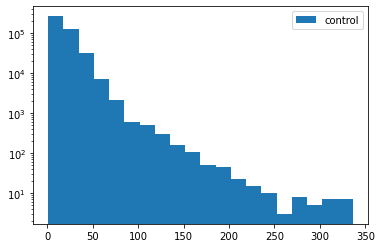

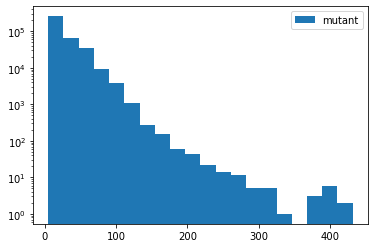

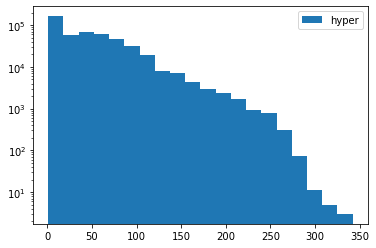

In [14]:
for i in range(fignum):
    oridata = np.unique(data_dict[metadata.index[i]])

    print (np.unique(oridata))
    print(metadata.index[i])

KeyboardInterrupt: 

In [4]:
!pwd

/home/yiwen/mice_physiology/micenew/rebuild/group_average


In [117]:
import tools.miceutil as mt
import numpy as np
import matplotlib.pyplot as plt

oridata_dict = mt.mice_original_data('/home/yiwen/mice_physiology/micenew/rebuild/group_average')

day_data_dict, night_data_dict = mt.mice_day_night_data('/home/yiwen/mice_physiology/micenew/rebuild/group_average')

data_dict, smooth_data_dict = mt.mice_selected_data('../../causality/selected_data' )

control_day_data, mutant_day_data, hyper_day_data = mt.batch_poolize(day_data_dict, metadata)

control_night_data, mutant_night_data, hyper_night_data = mt.batch_poolize(night_data_dict, metadata)

12Otx2
56Otx2
73Otx2
84Otx2
51M
52M
54M
56M
58M
68M
62M
82WT
83WT
53
55
57
61
63
65
67
12Otx2
56Otx2
73Otx2
84Otx2
51M
52M
54M
56M
58M
68M
62M
82WT
83WT
53
55
57
61
63
65
67
12Otx2
56Otx2
73Otx2
84Otx2
51M
52M
54M
56M
58M
68M
62M
64M
82WT
83WT
53
55
57
61
63
65
67
hyper 
56Otx2 73Otx2 51M 68M 62M  len:  5
mutant
12Otx2 84Otx2 52M 54M 56M 58M  len:  6
control
82WT 83WT 53 55 57 61 63 65 67  len:  9
hyper 
56Otx2 73Otx2 51M 68M 62M  len:  5
mutant
12Otx2 84Otx2 52M 54M 56M 58M  len:  6
control
82WT 83WT 53 55 57 61 63 65 67  len:  9


In [5]:
waveform = {}

In [6]:
def waveform_overview(name:str, offset:int):
    oridata = oridata_dict[name]
    length = len(oridata) // 96 * 96
    data = np.array(oridata[:length])
    days = length // 96
    data = data[:length]
    # data = data - data.mean()
    # data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    data = np.concatenate([average[offset:], average[:offset]])
    
    waveform[name] = data
    x = np.arange(0, 24, 24/len(data))
    xticks = np.arange(0, 24+0.001, 4)
    plt.plot(x, data, 'r', label=name)
    plt.xticks(xticks)
    plt.axvspan(12,24, alpha=0.3)
    plt.legend(loc='best')
    plt.show()

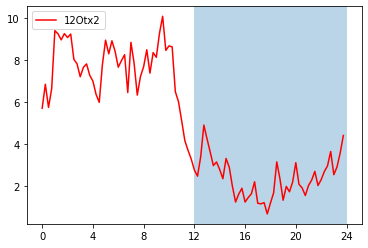

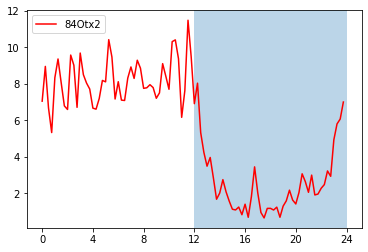

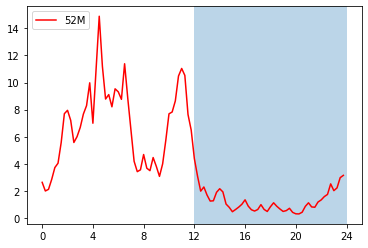

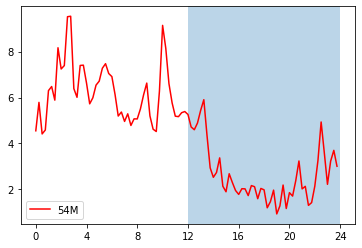

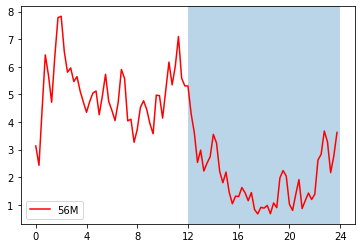

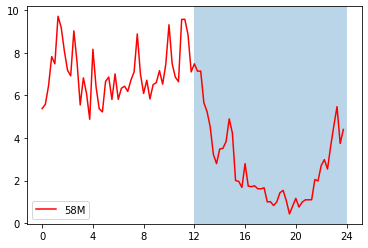

In [30]:
# normal mutant
waveform_overview('12Otx2', 0)
waveform_overview('84Otx2', 0)
waveform_overview('52M', 0)
waveform_overview('54M', 0)
waveform_overview('56M', 5)
waveform_overview('58M', 7)

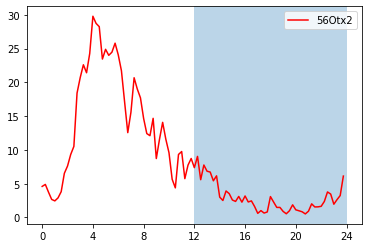

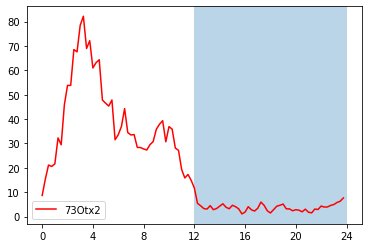

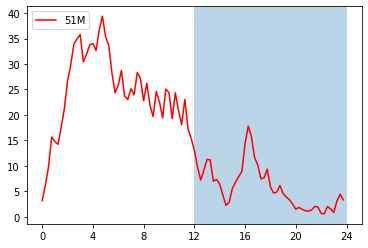

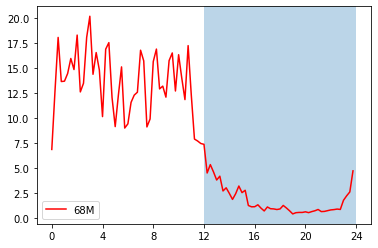

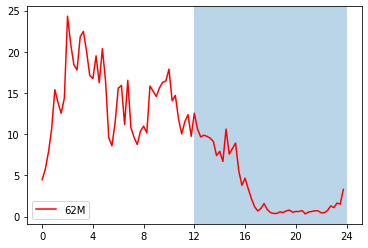

In [31]:
# hyper mutant 
waveform_overview('56Otx2', -2)
waveform_overview('73Otx2', 5)
waveform_overview('51M', -15)
waveform_overview('68M', -5)
waveform_overview('62M', -10)

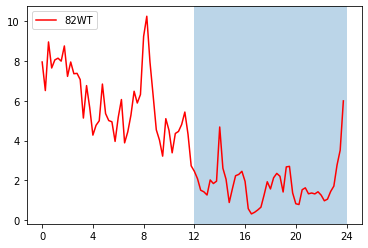

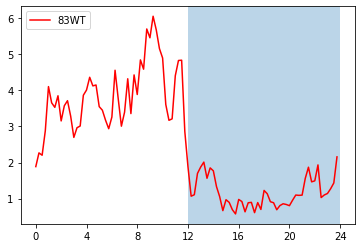

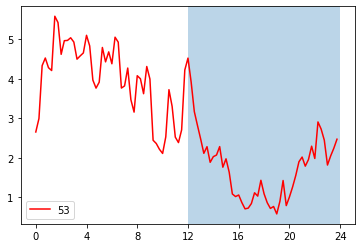

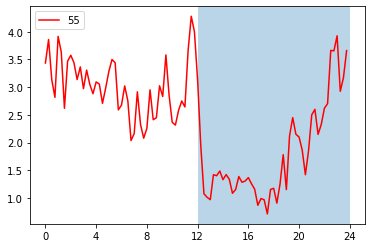

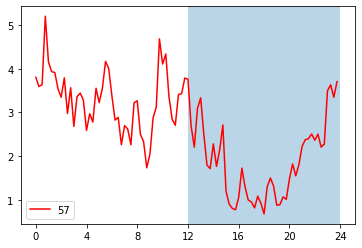

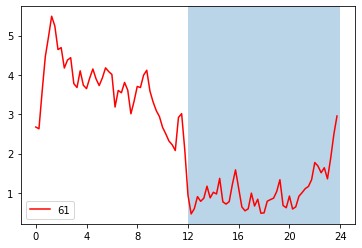

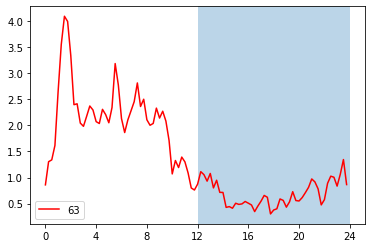

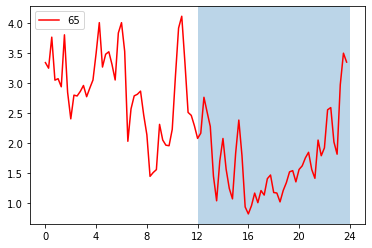

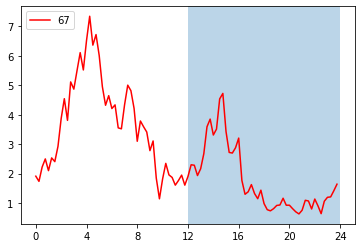

In [32]:
# control 
waveform_overview('82WT', 3)
waveform_overview('83WT', 0)
waveform_overview('53', -5)
waveform_overview('55', 5)
waveform_overview('57', 0)
waveform_overview('61', 0)
waveform_overview('63', -24)
waveform_overview('65', 0)
waveform_overview('67', -15)

In [33]:
waveform.keys()

dict_keys(['12Otx2', '84Otx2', '52M', '54M', '56M', '58M', '56Otx2', '73Otx2', '51M', '68M', '62M', '82WT', '83WT', '53', '55', '57', '61', '63', '65', '67'])

In [34]:
control = []
mutant = []
hyper = []

for name in waveform.keys():
    if metadata.loc[name,'type'] == 'hyper':
        hyper.append(waveform[name])
    elif metadata.loc[name,'type'] == 'control':
        control.append(waveform[name])
    else:
        mutant.append(waveform[name])
    print (name)

12Otx2
84Otx2
52M
54M
56M
58M
56Otx2
73Otx2
51M
68M
62M
82WT
83WT
53
55
57
61
63
65
67


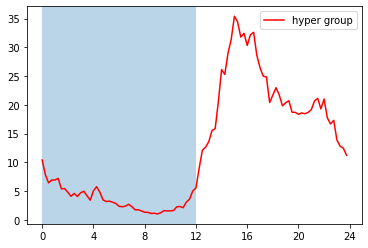

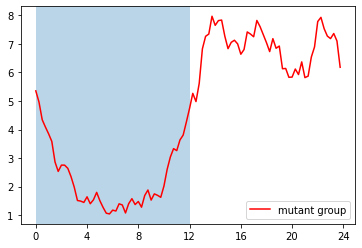

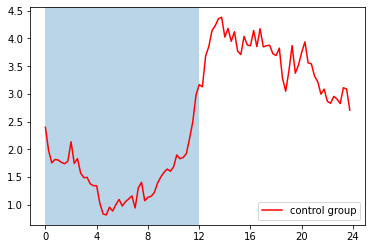

In [37]:
offset = 48

average = np.array(hyper).mean(axis=0)
data = np.concatenate([average[offset:], average[:offset]])
x = np.arange(0, 24, 24/len(data))
xticks = np.arange(0, 24+0.001, 4)
plt.plot(x, data, 'r', label='hyper group')
plt.xticks(xticks)
plt.axvspan(0,12, alpha=0.3)
plt.legend(loc='best')
plt.show()

average = np.array(mutant).mean(axis=0)
data = np.concatenate([average[offset:], average[:offset]])
x = np.arange(0, 24, 24/len(data))
xticks = np.arange(0, 24+0.001, 4)
plt.plot(x, data, 'r', label='mutant group')
plt.xticks(xticks)
plt.axvspan(0,12, alpha=0.3)
plt.legend(loc='best')
plt.show()

average = np.array(control).mean(axis=0)
data = np.concatenate([average[offset:], average[:offset]])
x = np.arange(0, 24, 24/len(data))
xticks = np.arange(0, 24+0.001, 4)
plt.plot(x, data, 'r', label='control group')
plt.xticks(xticks)
plt.axvspan(0,12, alpha=0.3)
plt.legend(loc='best')
plt.show()

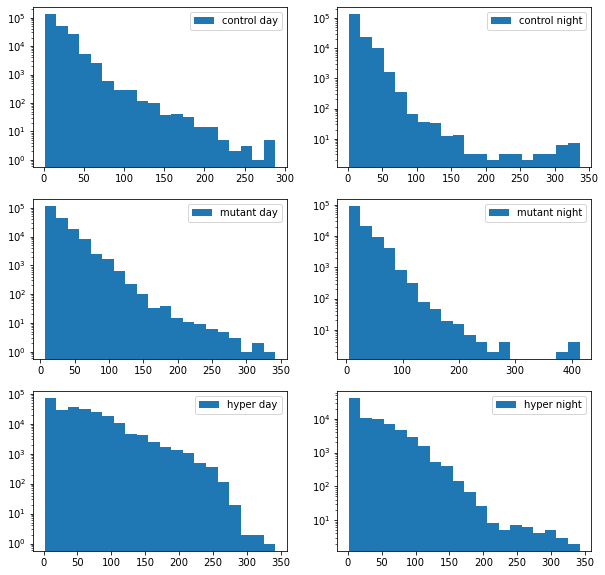

In [88]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))

xlog, ylog = 0,1

oridata = control_day_data[:,1]
axes[0][0].hist(oridata[oridata>0], bins=20, label='control day')
if xlog:
    axes[0][0].set_xscale('log')
if ylog:
    axes[0][0].set_yscale('log')    
axes[0][0].legend(loc='best')

oridata = control_night_data[:,1]
axes[0][1].hist(oridata[oridata>0], bins=20, label='control night')
if xlog:
    axes[0][1].set_xscale('log')
if ylog:
    axes[0][1].set_yscale('log') 
axes[0][1].legend(loc='best')

oridata = mutant_day_data[:,1]
axes[1][0].hist(oridata[oridata>0], bins=20, label='mutant day')
if xlog:
    axes[1][0].set_xscale('log')
if ylog:
    axes[1][0].set_yscale('log') 
axes[1][0].legend(loc='best')

oridata = mutant_night_data[:,1]
axes[1][1].hist(oridata[oridata>0], bins=20, label='mutant night')
if xlog:
    axes[1][1].set_xscale('log')
if ylog:
    axes[1][1].set_yscale('log') 
axes[1][1].legend(loc='best')

oridata = hyper_day_data[:,1]
axes[2][0].hist(oridata[oridata>0], bins=20, label='hyper day')
if xlog:
    axes[2][0].set_xscale('log')
if ylog:
    axes[2][0].set_yscale('log')
axes[2][0].legend(loc='best')

oridata = hyper_night_data[:,1]
axes[2][1].hist(oridata[oridata>0], bins=20, label='hyper night')
if xlog:
    axes[2][1].set_xscale('log')
if ylog:
    axes[2][1].set_yscale('log')
axes[2][1].legend(loc='best')

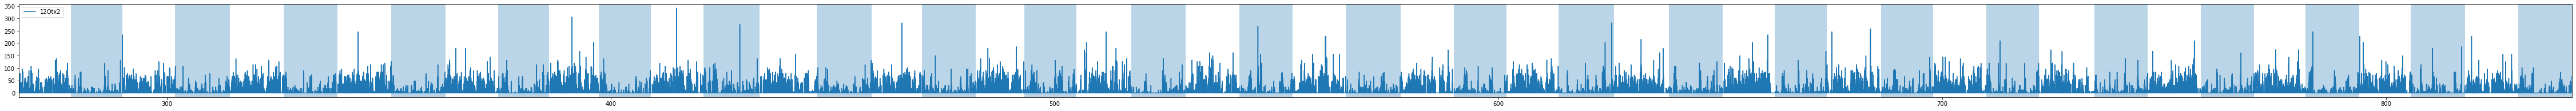

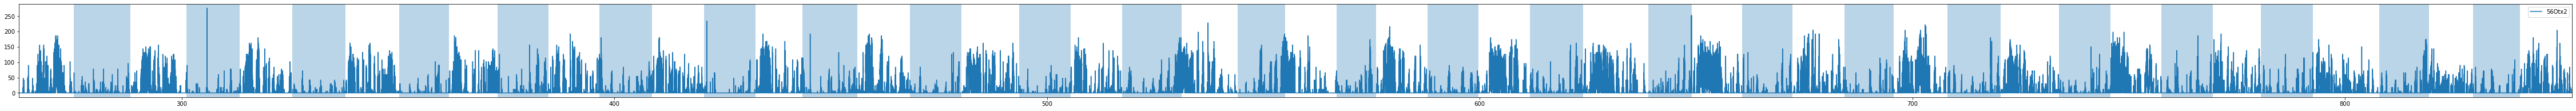

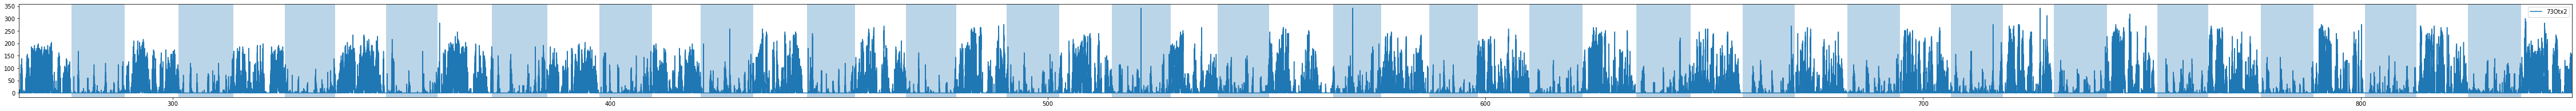

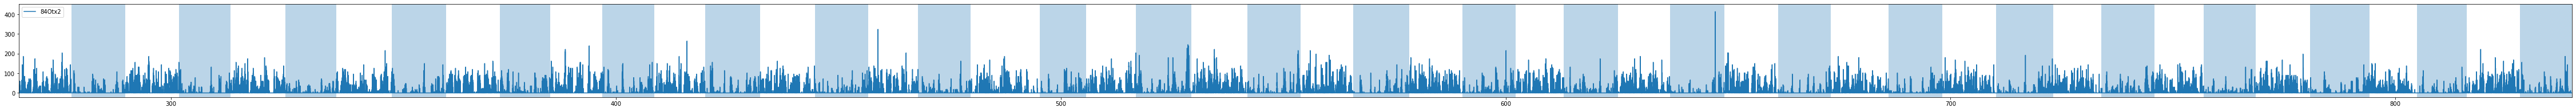

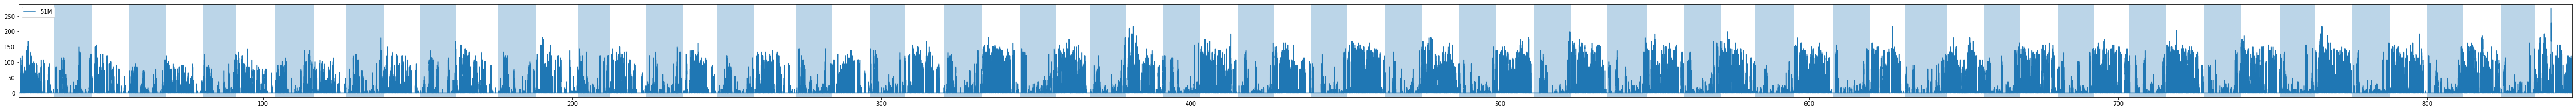

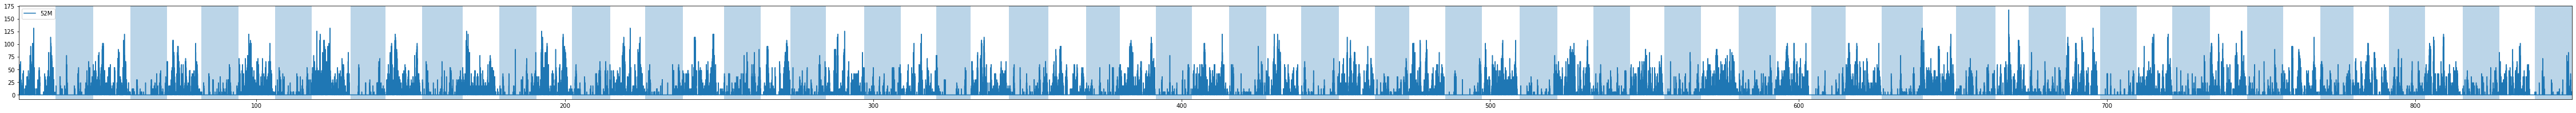

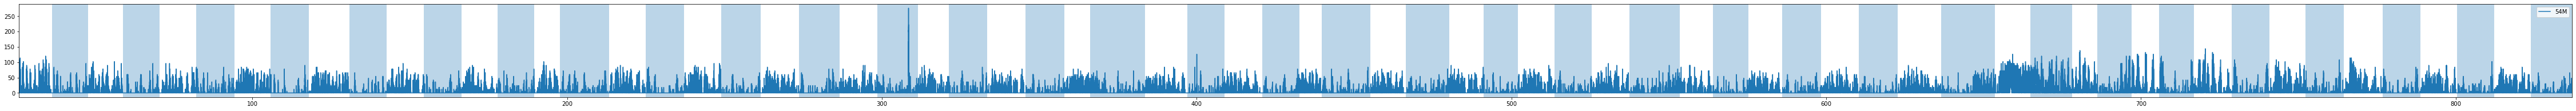

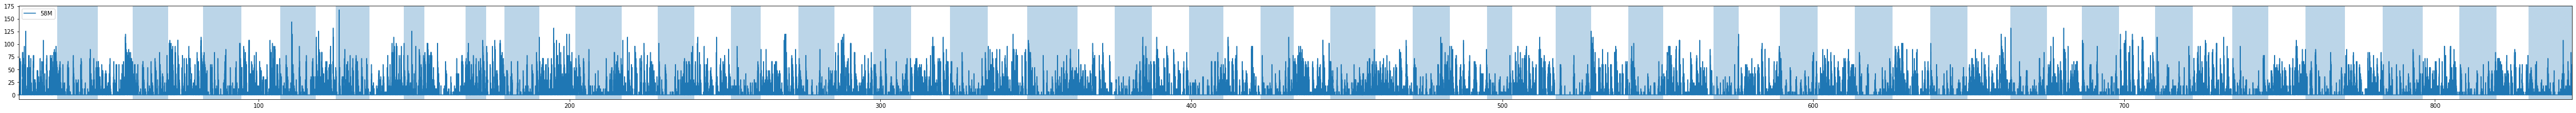

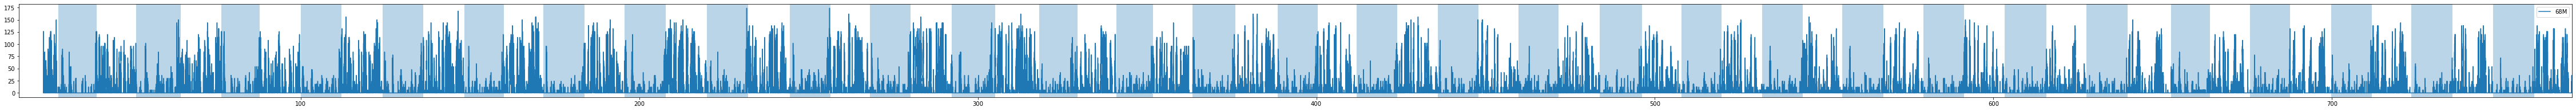

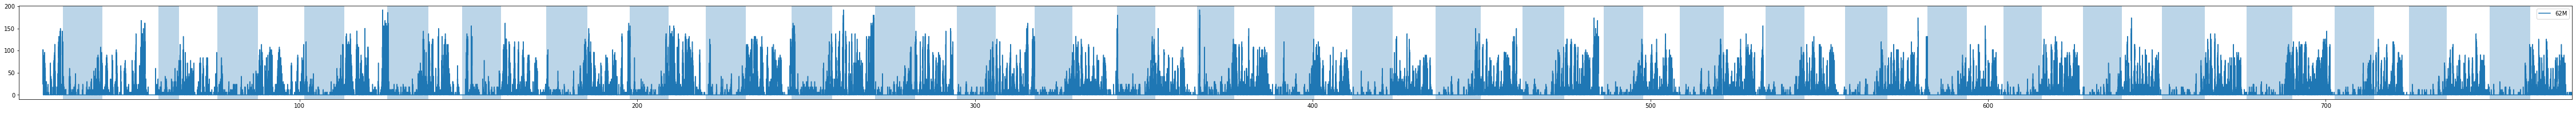

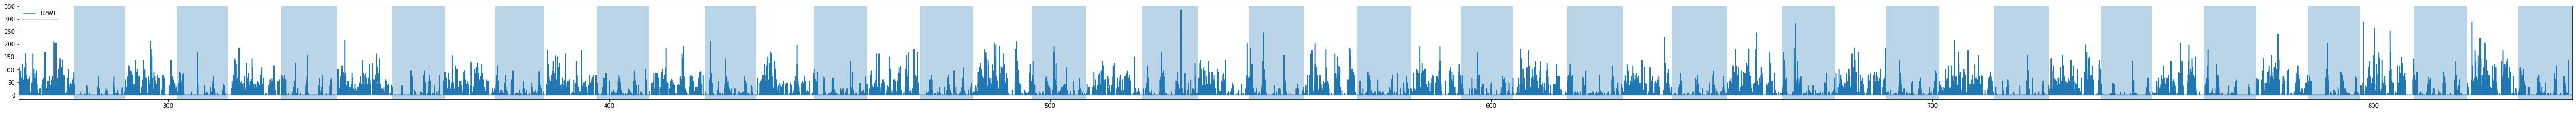

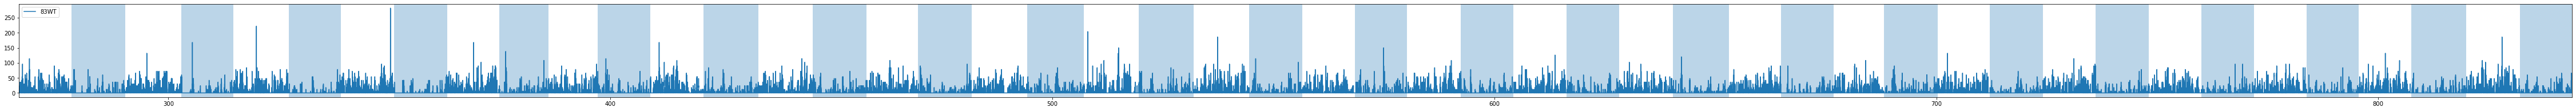

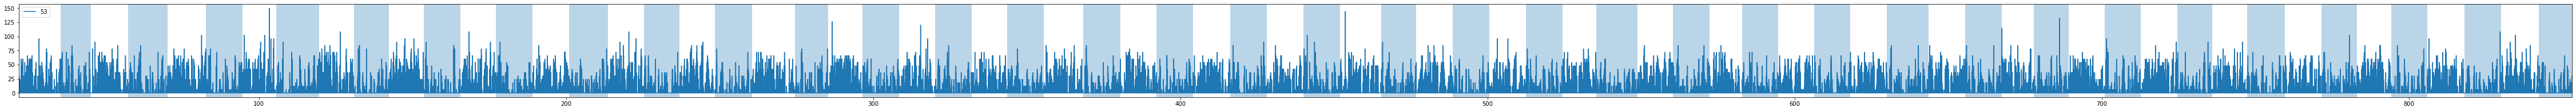

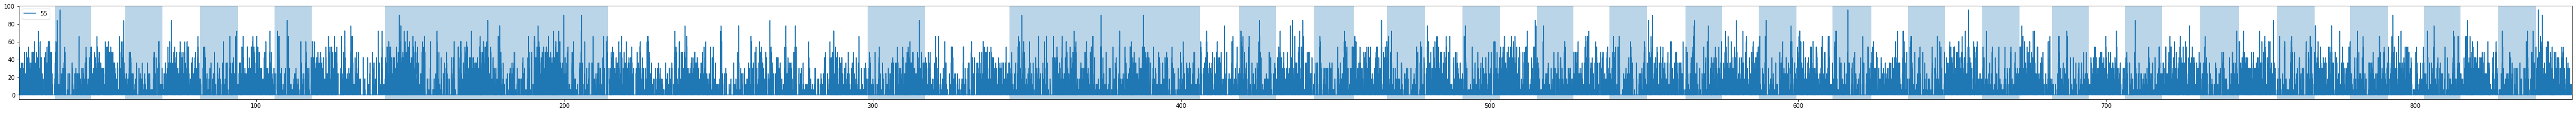

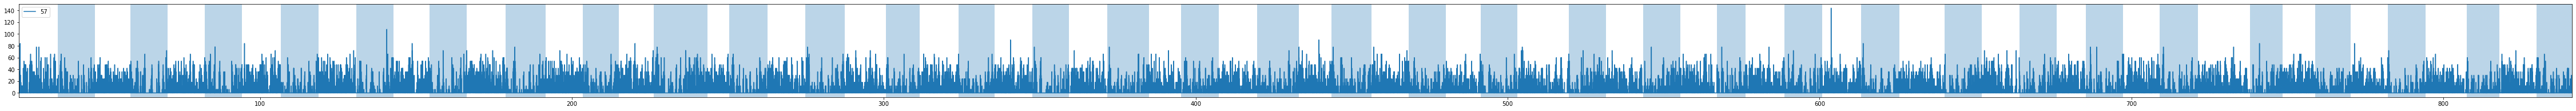

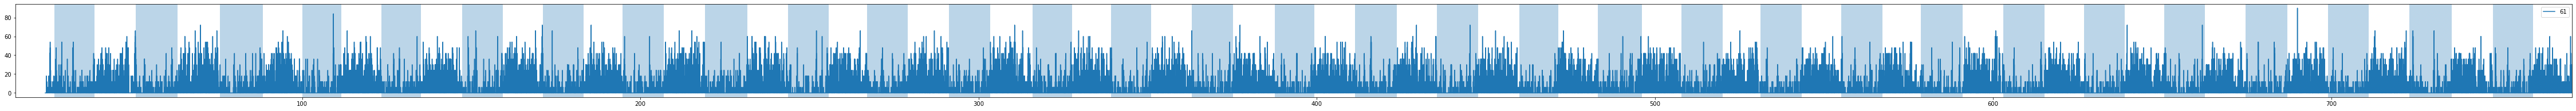

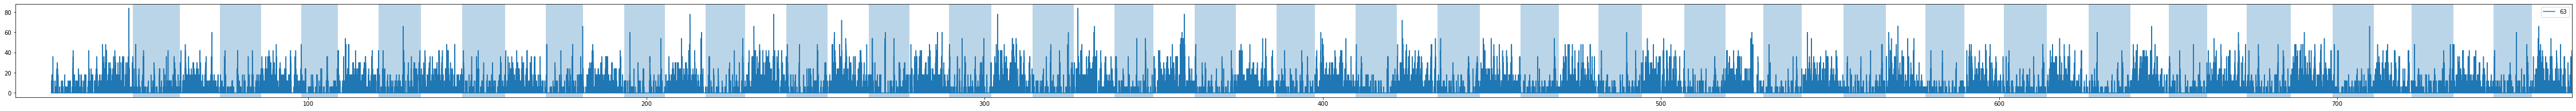

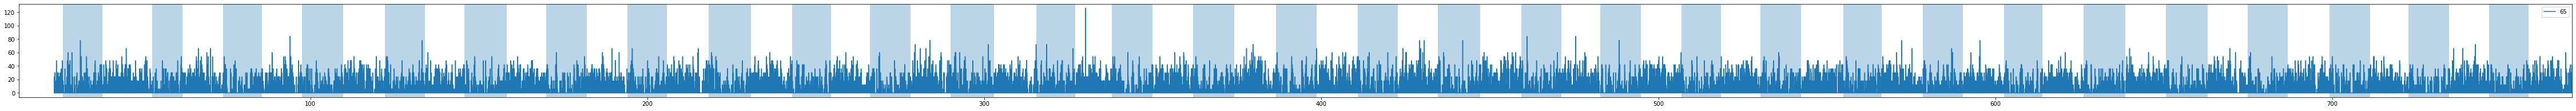

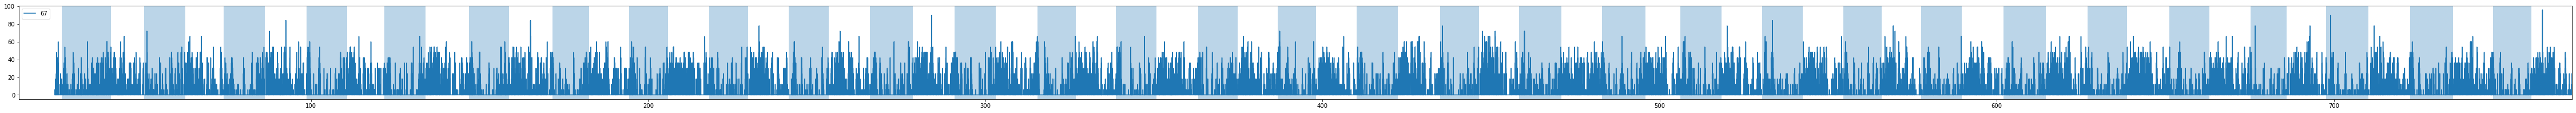

In [158]:
# day/night


for name in data_dict.keys():
    if name == '64M' or name == '56M':
        continue
    path = '/home/yiwen/mice_physiology/micenew/rebuild/group_average'
    phase_markers = np.genfromtxt(path + '/{}phase_markers.txt'.format(name))
    fig= plt.figure(figsize=(80, 3))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data_dict[name][:,0], data_dict[name][:,1], label=name)
    ax.set_xlim(phase_markers[0], phase_markers[-1])
    i = 2
    while i < len(phase_markers):
        ax.axvspan(phase_markers[i-1], phase_markers[i], alpha=0.3)
        i += 2
    ax.legend(loc='best')
# fig.savefig("day_night.pdf")

In [119]:
xlog, ylog = 0, 1

def plot_hist(name:str, day, night, xlog:bool=0, ylog:bool=0):
    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    if np.mean(day) < np.mean(night):
        swap = day.copy()
        day = night.copy()
        night = swap.copy()
        
    if metadata.loc[name,'type'] == 'hyper':
        color = 'r'
    elif metadata.loc[name,'type'] == 'control':
        color = 'g'
    else:
        color = 'b'

    axes[0].hist(night[night>=0], bins=30, label=name+' sleep', color=color, density=True)
    if xlog:
        axes[0].set_xscale('log')
    if ylog:
        axes[0].set_yscale('log')
    axes[0].legend(loc='best')

    axes[1].hist(day[day>0], bins=30, label=name+' active', color=color, density=True)
    if xlog:
        axes[1].set_xscale('log')
    if ylog:
        axes[1].set_yscale('log')
    axes[1].legend(loc='best')

12Otx2: 2.4615059627830163 7.285705960059056
56Otx2: 2.8817160007061733 15.511498855296256
73Otx2: 3.872964516472765 34.24770919441628
84Otx2: 2.723243379132301 8.29669189985558
51M: 6.773188450536107 24.173414410435846
52M: 1.3287310979618672 6.793957851469501
54M: 2.467892503536068 6.457063285572941
56M: 4.679610668323807 2.381112373570149
58M: 2.893100336368857 6.573006849727819
68M: 2.1464454834710125 13.139992362010737
62M: 3.177470856950789 14.32080684060513
82WT: 1.911728898049178 5.810849763634267
83WT: 1.1885529656127394 3.735058438747535
53: 1.729900227878723 3.9921642040516145
55: 2.0090013283898727 2.8501252992088952
57: 1.9394672629768839 3.178633156428557
61: 1.0561664168248177 3.6755786504566608
63: 0.6864911958914159 2.0692403123403635
65: 1.7403097857992262 2.8448589559634927
67: 1.747556735948434 3.649839427153576


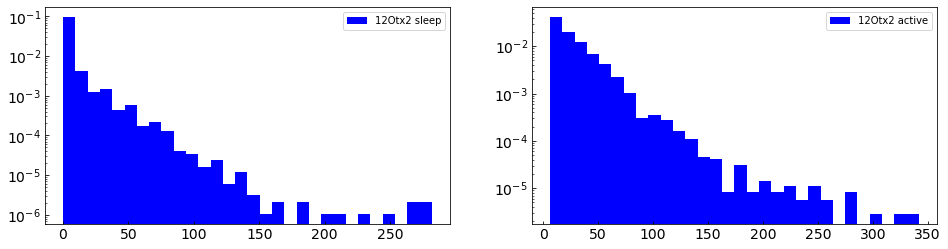

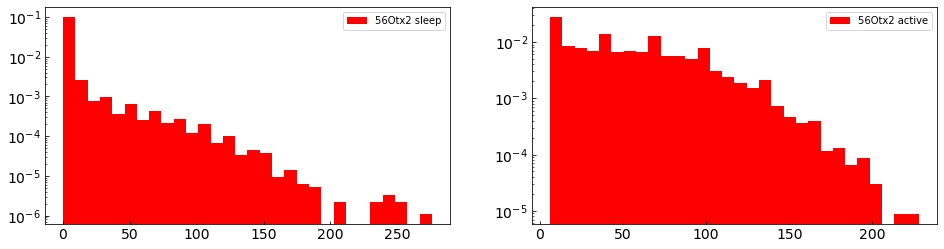

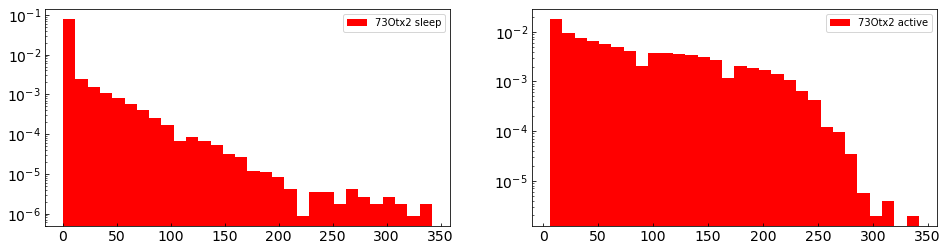

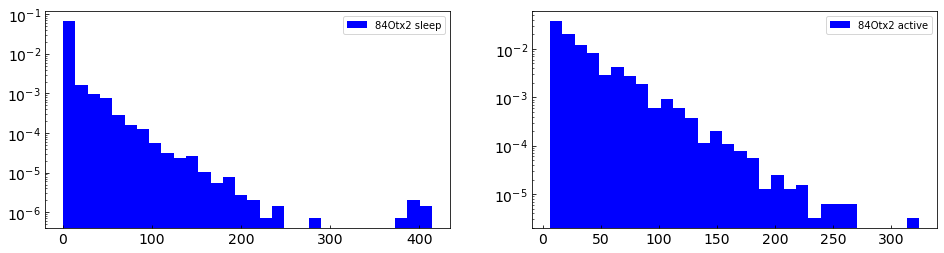

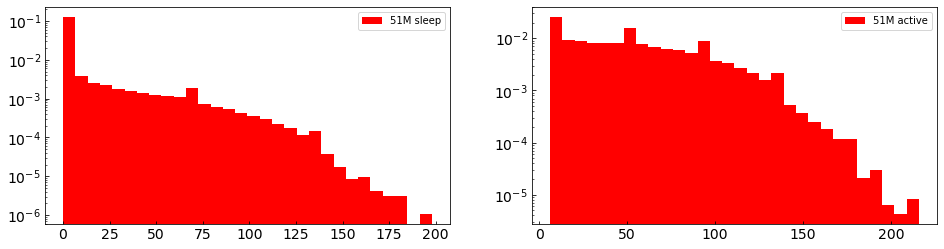

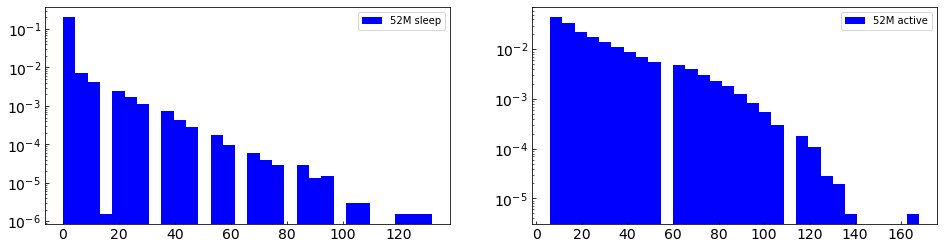

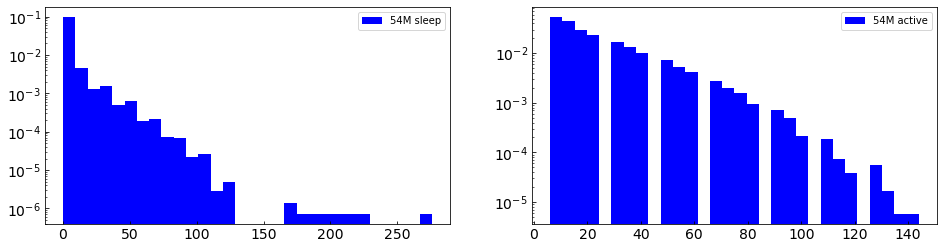

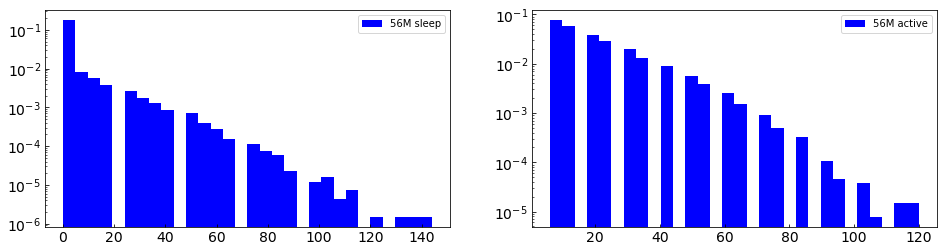

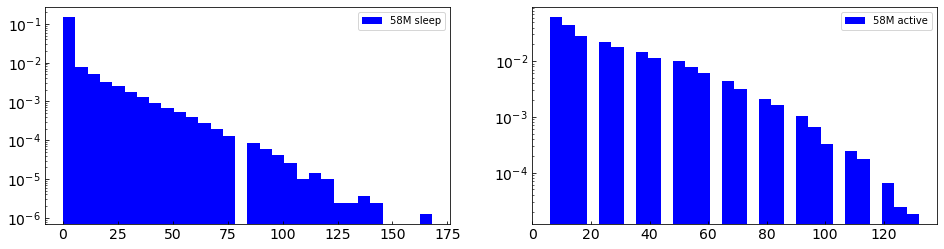

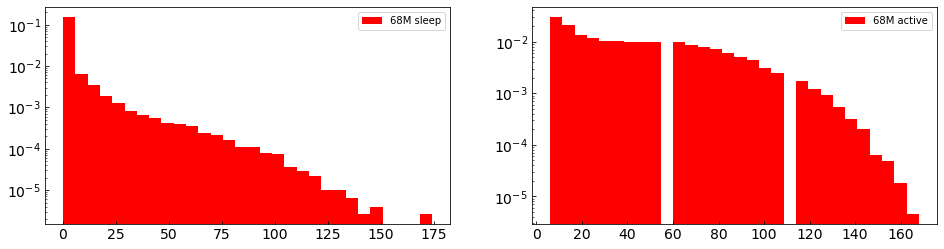

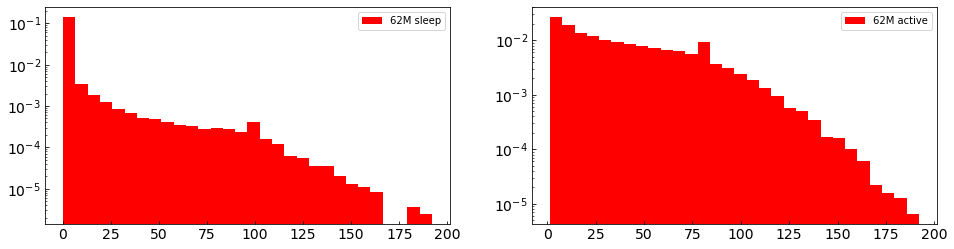

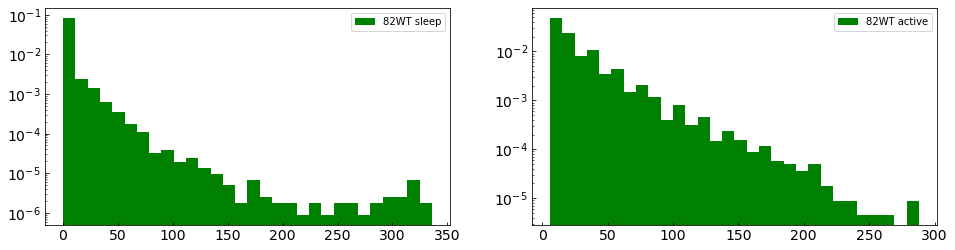

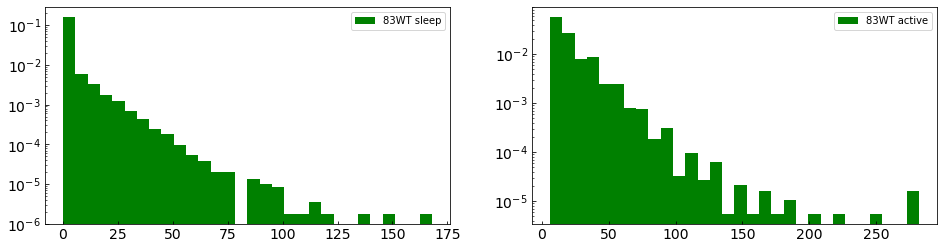

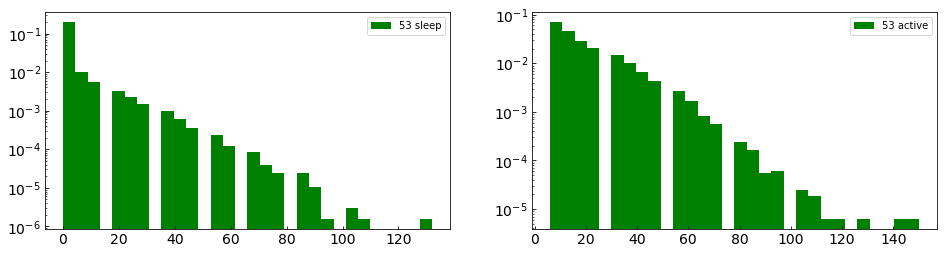

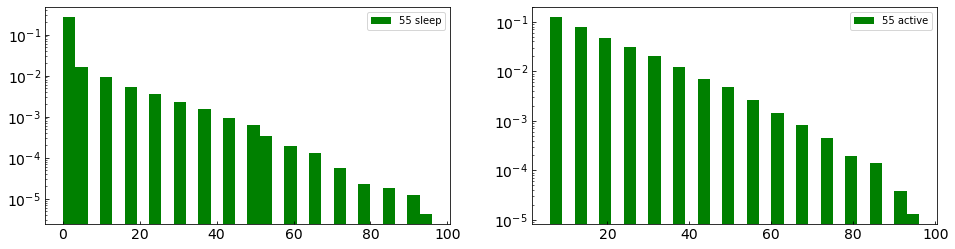

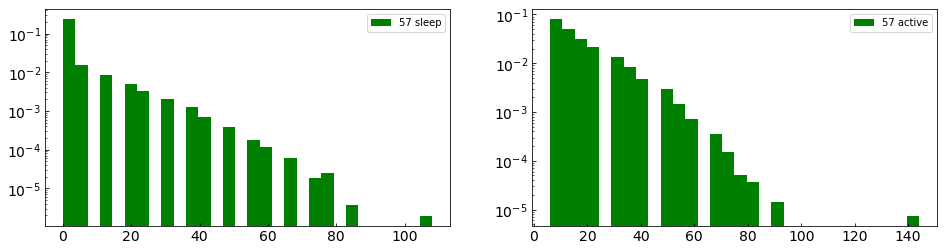

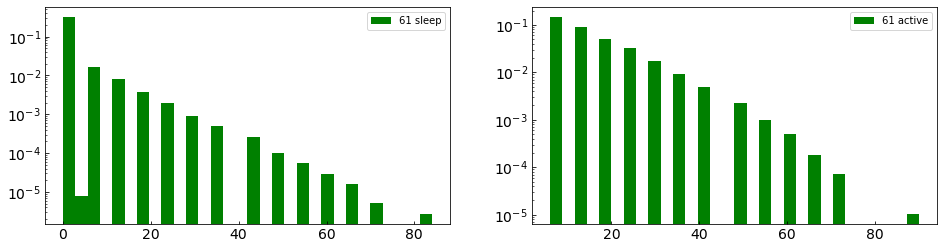

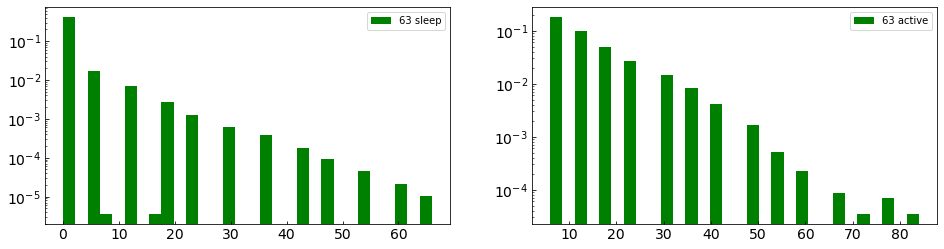

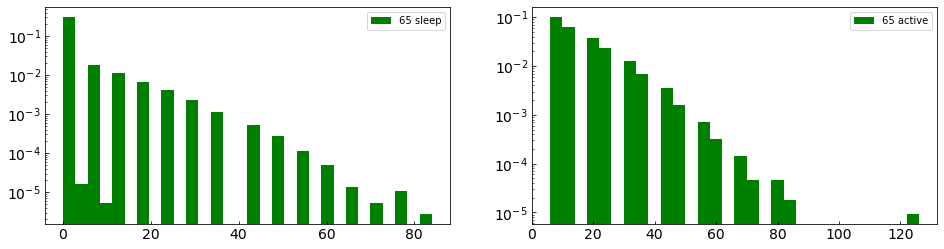

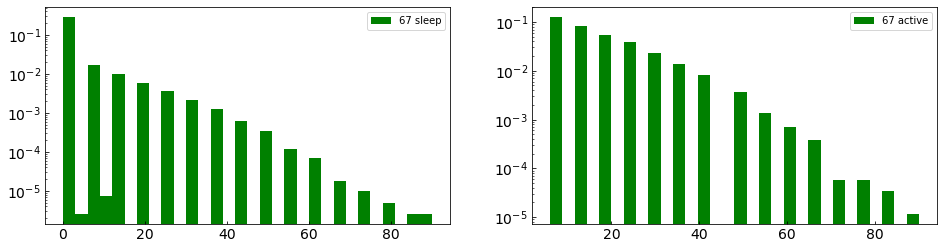

In [120]:
# metadata.drop('56M', axis=0)
# metadata.drop('64M', axis=0)

for name in metadata.index:
    plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)
    print (name + ":", np.mean(night_data_dict[name][:,1]), np.mean(day_data_dict[name][:,1]))

# Group Pool data

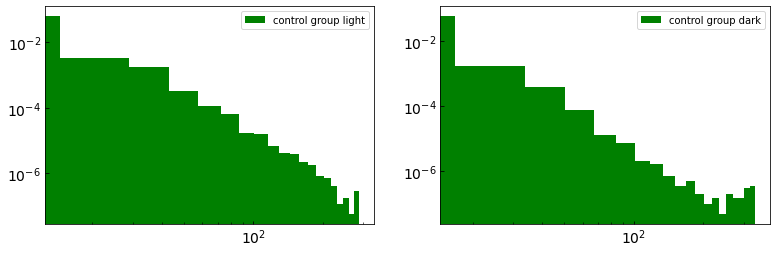

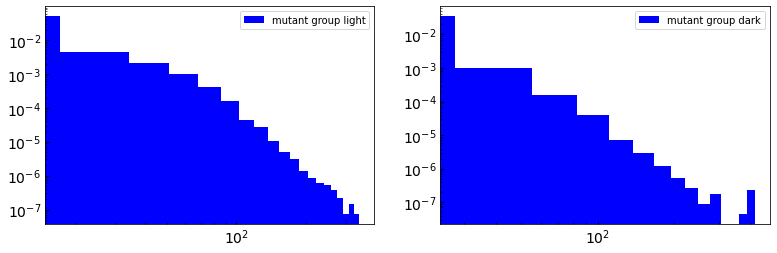

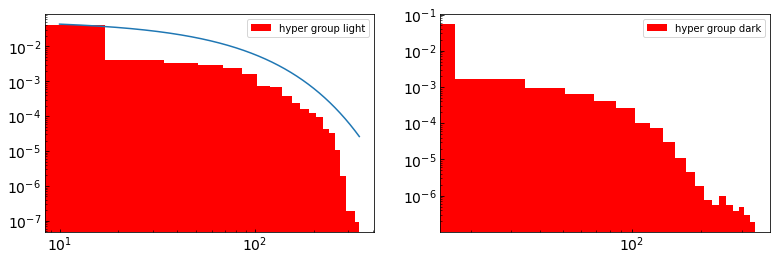

In [149]:
fig, axes = plt.subplots(1,2,figsize=(13,4))
oridata = control_day_data[:,1]
col = 'g'
axes[0].hist(oridata[oridata>=0], bins=20, label='control group light', color = col, density=True)
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].legend(loc='best')

oridata = control_night_data[:,1]
axes[1].hist(oridata[oridata>=0], bins=20, label='control group dark', color = col, density=True)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].legend(loc='best')

plt.show()

# mutant
fig, axes = plt.subplots(1,2,figsize=(13,4))
oridata = mutant_day_data[:,1]
col = 'b'
axes[0].hist(oridata[oridata>=0], bins=20, label='mutant group light', color = col, density=True)
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].legend(loc='best')

oridata = mutant_night_data[:,1]
axes[1].hist(oridata[oridata>=0], bins=15, label='mutant group dark', color = col, density=True)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].legend(loc='best')
plt.show()

# hyper
fig, axes = plt.subplots(1,2,figsize=(13,4))
oridata = hyper_day_data[:,1]
col = 'r'
axes[0].hist(oridata[oridata>=0], bins=20, label='hyper group light', color = col, density=True)
axes[0].set_yscale('log')
axes[0].set_xscale('log')

x = np.arange(10, np.max(oridata[oridata>=0]), 0.01)
# x = x / 10000
lembda = 0.02235883281303967
y = lembda * np.exp(-1*lembda*(x-40))

axes[0].plot(x, y)
axes[0].legend(loc='best')

oridata = hyper_night_data[:,1]
axes[1].hist(oridata[oridata>=0], bins=20, label='hyper group dark', color = col, density=True)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].legend(loc='best')

# x = np.arange(3000000)
# x = x / 10000
# lembda = 0.03278716933394564
# y = lembda * np.exp(-1*lembda*(x-30))

# axes[1].plot(x, y)

plt.show()

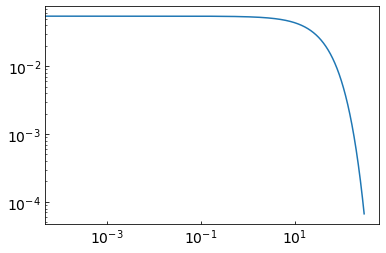

In [151]:
x = np.arange(3000000)
x = x / 10000
lembda = 0.02235883281303967
y = lembda * np.exp(-1*lembda*(x-40))

plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')

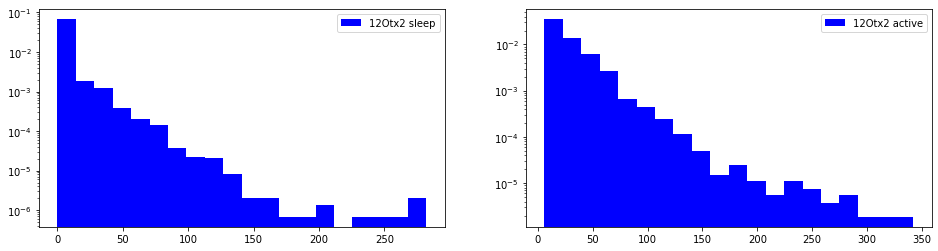

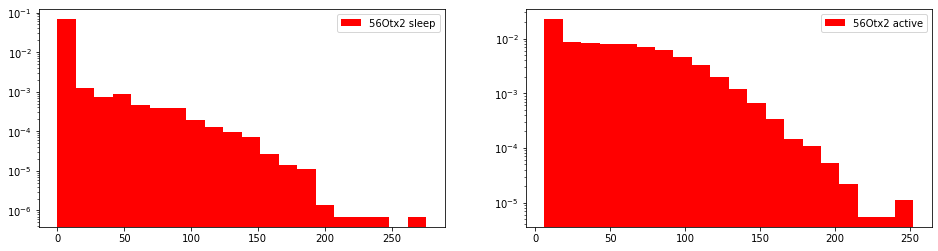

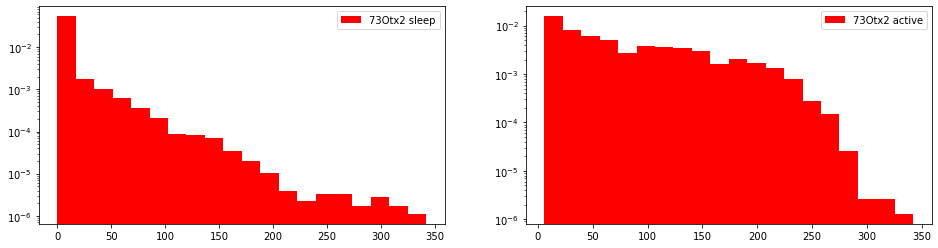

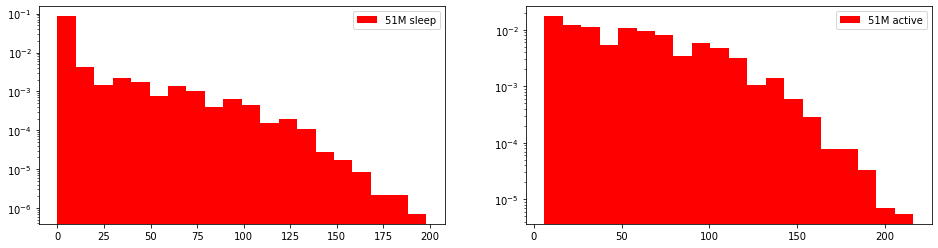

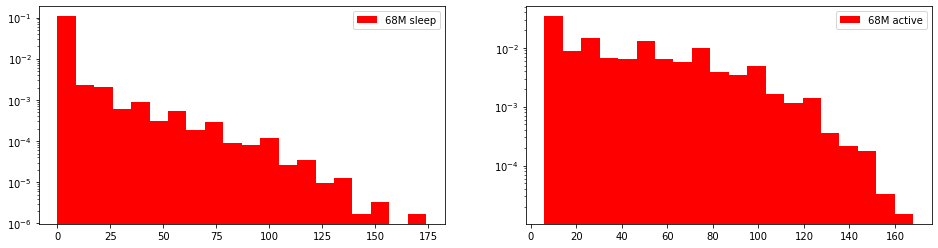

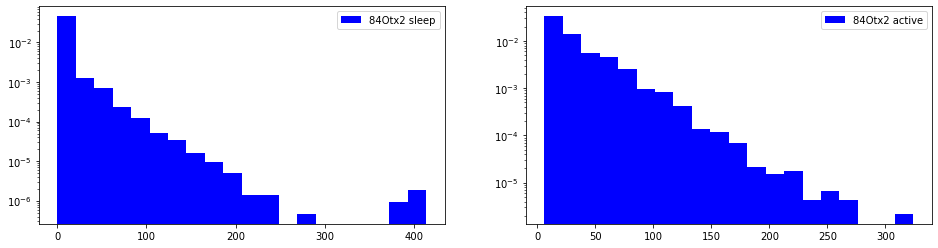

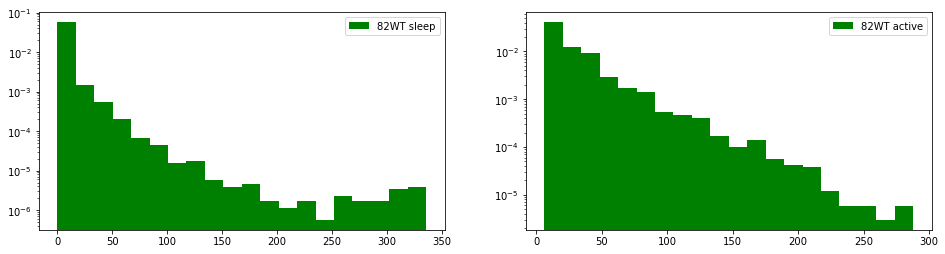

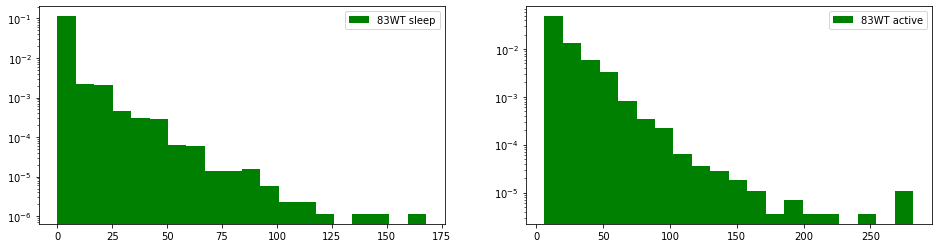

In [87]:
name = '12Otx2'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)

name = '56Otx2'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)


name = '73Otx2'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)

name = '51M'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)

name = '68M'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)


name = '84Otx2'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)


name = '82WT'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)


name = '83WT'
plot_hist(name, night_data_dict[name][:,1], day_data_dict[name][:,1], 0, 1)

In [133]:
group = False


if group == True:
    control_data = np.array(control).mean(axis=0)
    mutant_data = np.array(mutant).mean(axis=0)
    hyper_data = np.array(hyper).mean(axis=0)
else:
    control_data = 
    mutant_data = 
    hyper_data = 

x = np.arange(the_choosen_len)
x = x / 4 / 24

fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(3,3, hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel('Activity')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

control_plot = fig.add_subplot(gs[0,0:2])
mutant_plot = fig.add_subplot(gs[1,0:2], sharex=control_plot)
hyper_plot = fig.add_subplot(gs[2,0:2], sharex=control_plot)

data = np.square(np.abs(np.fft.rfft(control_data-np.mean(control_data))))
data = data - np.mean(data)
# data = data / np.std(data)
x = np.arange(len(data))
x = x + 1
x = the_choosen_len/ 4 / x
control_plot.set_xscale('log')
# control_plot.set_yscale('log')
handle1, = control_plot.plot(x, data, 'g', label='control')
control_plot.set_xlim(np.min(x),48)

data = np.square(np.abs(np.fft.rfft(mutant_data-np.mean(mutant_data))))
data = data - np.mean(data)
# data = data / np.std(data)
x = np.arange(len(data))
x = x + 1
x = the_choosen_len/ 4 / x
mutant_plot.set_xscale('log')
# mutant_plot.set_yscale('log')
handle2, = mutant_plot.plot(x, data, 'b', label='mutant - normal activity')
mutant_plot.set_xlim(np.min(x),48)

data = np.square(np.abs(np.fft.rfft(hyper_data-np.mean(hyper_data))))
data = data - np.mean(data)
# data = data / np.std(data)
x = np.arange(len(data))
x = x + 1
x = the_choosen_len/ 4 / x
hyper_plot.set_xscale('log')
# hyper_plot.set_yscale('log')
handle3, = hyper_plot.plot(x, data, 'r', label='mutant - hyper activity')
hyper_plot.set_xlim(np.min(x),48)

control_plot.legend(handles=[handle1, handle2, handle3], loc='best')

# Draw waveform
control_waveform_plot = fig.add_subplot(gs[0,2])
mutant_waveform_plot = fig.add_subplot(gs[1,2])
hyper_waveform_plot = fig.add_subplot(gs[2,2])

x = np.arange(96)
x = x / 4

length = len(control_data) // 96 * 96
data = np.array(control_data[:length])
days = length // 96
data = data[:length]
# data = data - data.mean()
# data = data / data.std()
average = data.reshape(days, 96).mean(axis=0)
offset = 7
data = np.concatenate([average[offset:], average[:offset]])
control_waveform_plot.plot(data, 'g')
control_waveform_plot.axvspan(0,48, alpha=0.3)

length = len(mutant_data) // 96 * 96
data = np.array(mutant_data[:length])
days = length // 96
data = data[:length]
# data = data - data.mean()
# data = data / data.std()
average = data.reshape(days, 96).mean(axis=0)
offset = 10
data = np.concatenate([average[offset:], average[:offset]])
mutant_waveform_plot.plot(data, 'b')
mutant_waveform_plot.axvspan(0,48, alpha=0.3)

length = len(hyper_data) // 96 * 96
data = np.array(hyper_data[:length])
days = length // 96
data = data[:length]
# data = data - data.mean()
# data = data / data.std()
average = data.reshape(days, 96).mean(axis=0)
if group:
    offset = 5
else:
    offset = 77
data = np.concatenate([average[offset:], average[:offset]])
hyper_waveform_plot.plot(data, 'r')
hyper_waveform_plot.axvspan(0,48, alpha=0.3)

hyper_plot.set_xlabel('hour')
hyper_waveform_plot.set_xlabel('hour')

figname = "spectrum_waveform_{}.pdf".format("group" if group == True else "individual")
fig.savefig(figname)
print ("savefig: ", figname)


SyntaxError: invalid syntax (<ipython-input-133-da6dc669fa13>, line 9)

## LikeliHood 

In [127]:
def power_log_MLE(x, a):
    """
        x: array like 
        return: likelihood param with MLEs
    """
    import numpy as np
    
    x = np.array(x).copy()
    x = x[x>=a]
    n = len(x)
    
    mu = 1 - n / (n * np.log(a) - np.sum(np.log(x)))
    
    loglikelihood = n * np.log(mu - 1) + n * (mu -1) * np.log(a) - mu * np.sum(np.log(x))
    
    return loglikelihood, mu

def exp_log_MLE(x, a):
    """
        x: array like 
        return: likelihood param with MLEs
    """
    import numpy as np
    
    x = np.array(x).copy()
    x = x[x>=a]
    n = len(x)
    
    lembda = 1 / (np.sum(x)/n - a)
    
    loglikelihood = n * np.log(lembda) + n * lembda * a - lembda * np.sum(x)
    
    return loglikelihood, lembda

def poisson_log_MLE(x, a):
    """
        x: array like 
        return: likelihood param with MLEs
    """
    import numpy as np
    
    x = np.array(x).copy()
    x = x[x>=a]
    n = len(x)
    
    lembda = np.mean(x)
    
#     loglikelihood = - n*lembda - 
    
    return loglikelihood, lembda

def likelihood_aic(likelihood:float, n:int):
    import numpy as np
    
    return -2 * np.log(likelihood) + 2 * n

def aic_cre(aics):
    import numpy as np
    
    aics = np.array(aics).copy()
    
    aics = aics - aics.min()
# 82WT night	 power law

    weights = np.exp(-0.5 * aics)
    
    prob = weights / np.sum(weights)
    
    return prob, prob.argmax()

In [128]:
from scipy.stats import pareto, expon

In [134]:
alpha = 0.2
a = 40

temp_data = control_day_data[:,1]
# a = np.min(temp_data) * alpha + np.max(temp_data) * (1-alpha)
power_like = power_log_MLE(control_day_data[:,1], a)
exp_like = exp_log_MLE(control_day_data[:,1], a)
aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
res = aic_cre(aic)
print(res[0], power_like, exp_like)
print("control light\t", "exp" if res[1] == 1 else "power law")
print()

temp_data = control_night_data[:,1]
# a = np.min(temp_data) * alpha + np.max(temp_data) * (1-alpha)
power_like = power_log_MLE(control_night_data[:,1], a)
exp_like = exp_log_MLE(control_night_data[:,1], a)
aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
res = aic_cre(aic)
print(res[0], power_like, exp_like)
print("control dark\t", "exp" if res[1] == 1 else "power law")
print()

temp_data = mutant_day_data[:,1]
# a = np.min(temp_data) * alpha + np.max(temp_data) * (1-alpha)
power_like = power_log_MLE(mutant_day_data[:,1], a)
exp_like = exp_log_MLE(mutant_day_data[:,1], a)
aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
res = aic_cre(aic)
print(res[0], power_like, exp_like)
print("mutant light\t", "exp" if res[1] == 1 else "power law")
print()

temp_data = mutant_night_data[:,1]
# a = np.min(temp_data) * alpha + np.max(temp_data) * (1-alpha)
power_like = power_log_MLE(mutant_night_data[:,1], a)
exp_like = exp_log_MLE(mutant_night_data[:,1], a)
aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
res = aic_cre(aic)
print(res[0], power_like, exp_like)
print("mutant dark\t", "exp" if res[1] == 1 else "power law")
print()

temp_data = hyper_day_data[:,1]
# a = np.min(temp_data) * alpha + np.max(temp_data) * (1-alpha)
power_like = power_log_MLE(hyper_day_data[:,1], a)
exp_like = exp_log_MLE(hyper_day_data[:,1], a)
aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
res = aic_cre(aic)
print(res[0], power_like, exp_like)
print("hyper light\t", "exp" if res[1] == 1 else "power law")
print()

temp_data = hyper_night_data[:,1]
# a = np.min(temp_data) * alpha + np.max(temp_data) * (1-alpha)
power_like = power_log_MLE(hyper_night_data[:,1], a)
exp_like = exp_log_MLE(hyper_night_data[:,1], a)
aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
res = aic_cre(aic)
print(res[0], power_like, exp_like)
print("hyper dark\t", "exp" if res[1] == 1 else "power law")
print()

[1. 0.] (-56257.53957915475, 4.735575140847045) (-57074.122392031066, 0.0677798918046873)
control light	 power law

[1.00000000e+000 6.16411479e-186] (-19986.34683505255, 5.12243675943629) (-20412.808917809605, 0.07501913080191044)
control dark	 power law

[0. 1.] (-152827.68112997583, 3.804600694685107) (-151513.12011468632, 0.05081076752659184)
mutant light	 exp

[1.00000000e+00 4.02645548e-19] (-50111.725712447194, 4.217981870581922) (-50154.08194275937, 0.05877040857587004)
mutant dark	 power law

[0. 1.] (-616343.4137002073, 2.552836174580673) (-600373.4116321459, 0.0231443842485902)
hyper light	 exp

[0. 1.] (-100008.85029818784, 2.9696286290124587) (-97919.46178939557, 0.0325708163601686)
hyper dark	 exp



In [131]:
alpha = 0.3

a = 30

for name in metadata.index:
    temp_data = day_data_dict[name][:,1]
    
#     a = np.log(np.max(temp_data)) * (alpha)
#     a = np.exp(a)
    
    power_like = power_log_MLE(temp_data, a)
    exp_like = exp_log_MLE(temp_data, a)
    aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
    res = aic_cre(aic)
#     print(res[0], power_like, exp_like)
    print(name + "   day\t", "exp" if res[1] == 1 else "power law")
    
for name in metadata.index:
    temp_data = night_data_dict[name][:,1]

#     a = np.log(np.max(temp_data)) * (alpha)
#     a = np.exp(a)
    
    power_like = power_log_MLE(temp_data, a)
    exp_like = exp_log_MLE(temp_data, a)
    aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] - 1)]
    res = aic_cre(aic)
#     print(res[0], power_like, exp_like)
    print(name + " night\t", "exp" if res[1] == 1 else "power law")

12Otx2   day	 power law
56Otx2   day	 exp
73Otx2   day	 exp
84Otx2   day	 exp
51M   day	 exp
52M   day	 exp
54M   day	 exp
56M   day	 power law
58M   day	 exp
68M   day	 exp
62M   day	 exp
82WT   day	 power law
83WT   day	 power law
53   day	 power law
55   day	 power law
57   day	 power law
61   day	 power law
63   day	 power law
65   day	 power law
67   day	 power law
12Otx2 night	 power law
56Otx2 night	 exp
73Otx2 night	 exp
84Otx2 night	 power law
51M night	 exp
52M night	 power law
54M night	 power law
56M night	 power law
58M night	 power law
68M night	 exp
62M night	 exp
82WT night	 power law
83WT night	 power law
53 night	 power law
55 night	 power law
57 night	 power law
61 night	 power law
63 night	 power law
65 night	 power law
67 night	 power law


In [174]:
a = np.log(np.max(temp_data)) * (alpha)
np.max(temp_data), a, np.exp(a)

(90.0, 0.8999619340660531, 2.4595094858493636)

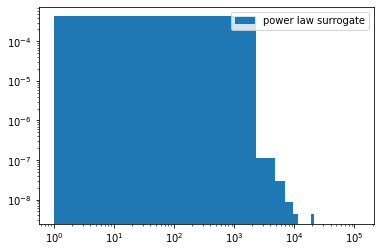

((array([1.00000000e+00, 8.27179499e-17]), 0),
 (-776.7002081720401, 2.1546617611785637),
 (-813.7313032186097, 0.00032183906849067085))

In [104]:
temp_data = pareto.rvs(1, size=100000)

plt.hist(temp_data, bins=50, density=True, label='power law surrogate')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

a = 1e3
power_like = power_log_MLE(temp_data, a)
exp_like = exp_log_MLE(temp_data, a)

aic = [-2*(power_like[0] - 1), -2 * (exp_like[0] -1)]
aic_cre(aic), power_like, exp_like

In [82]:
a = 0.1

x = temp_data[temp_data > a].copy()

length = len(x)

mu = 1 - length/(  length*np.log(a) - np.sum(np.log(x)))

a, x, length, mu, length*np.log(a), np.sum(np.log(x))

(0.1,
 array([2.28721286, 1.84498854, 1.74559388, ..., 1.83182828, 1.19773054,
        1.38523018]),
 100000,
 1.302825559918618,
 -230258.50929940454,
 99964.60669805027)

(0.0719231563379863, 1.0000073598020507, 1043575.6070065433)

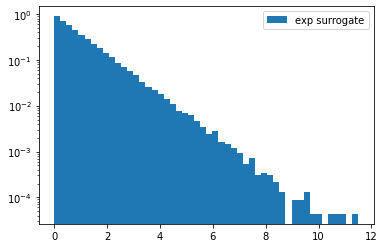

((array([0.34122902, 0.65877098]), 1),
 (-231.9721470310119, 8.335407635991675),
 (-231.3143249479274, 1.0695959365812948))

In [48]:
temp_data = expon.rvs(size=100000)

plt.hist(temp_data, bins=50, density=True, label='exp surrogate')
plt.yscale('log')
# plt.xscale('log')
plt.legend(loc='best')
plt.show()

a = 6
power_like = power_log_MLE(temp_data, a)[0]
exp_like = exp_log_MLE(temp_data, a)[0]
aic = [-2*(power_like - 1), -2 * (exp_like -1)]
aic_cre(aic), power_log_MLE(temp_data, a), exp_log_MLE(temp_data, a)